# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al segundo proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de 6 secciones:
* En la Parte 1, se plantea problemática sobre la cual se va a trabajar
* En la Parte 2, importar dataset para abordar la problemática planteada.Se realiza un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, se emplea el preprocesmiento de los datos y transformaciones
* En la Parte 4, se utilizan herramientas de Machine Learning para predecir la variable de interés, con modelos avanzados.
* En la Parte 5, hallazgos y conslusiones
* En la Parte 6, requerimientos adicionales del proyecto


En este proyecto se trabaja con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

---

<br />
<br />

#  Análisis Exploratorio de Datos
<br />
<br />

---

## 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
# Importar las herramientas para el analisis exploratorio de los datos.
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
# Cargar los datos de properati
df_properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
# número de filas y columnas
df_properati.shape

(146660, 19)

In [4]:
# Informacion general de los datos de cada cloumna
# Indica el numero de filas del dataset
# Muestra el numero de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
df_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [5]:
# Tipos de datos que existen en las columnas del dataframe(identificacion de variables)
print('Tipo de datos por variable:\n',df_properati.dtypes, sep = "")

Tipo de datos por variable:
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object


In [6]:
#Ver primeros elementos de properati
df_properati.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

In [7]:
#Tipo de propiedades
# pd.value_counts(df_properati["property_type"])
pd.value_counts(df_properati["property_type"])

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

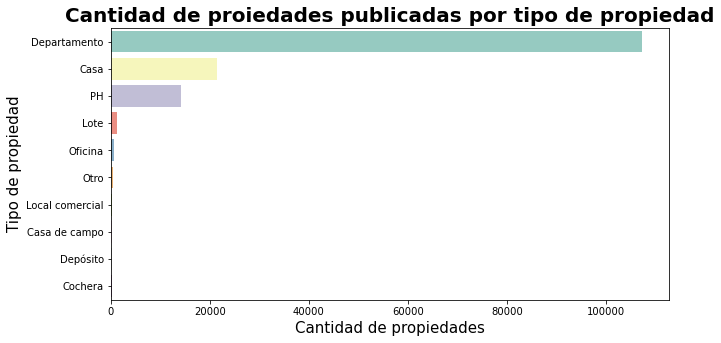

In [8]:
# Contar la cantidad de propiedades pro tipo de propiedad
plt.figure(figsize=(10,5))
ax = sns.countplot(y='property_type',data=df_properati,palette="Set3",order= df_properati['property_type'].value_counts().index);
ax.set_title('Cantidad de proiedades publicadas por tipo de propiedad',fontweight = 'black',fontsize=20);
ax.set_ylabel('Tipo de propiedad',fontsize=15);
ax.set_xlabel('Cantidad de propiedades',fontsize=15);


Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


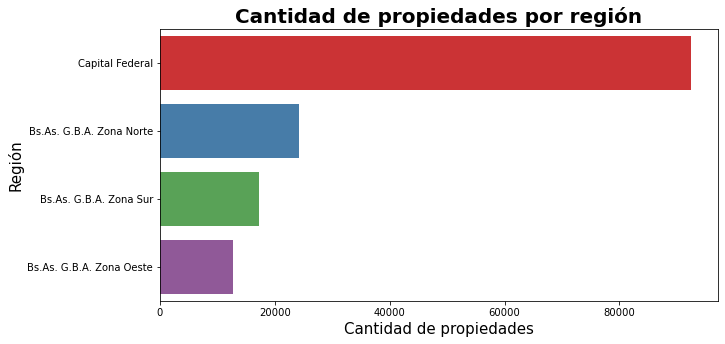

In [9]:
#Cantidad de propiedades por región
print(pd.value_counts(df_properati["l2"]))

# Grafico de la cantidad de propiedades por región
plt.figure(figsize=(10,5))
ax1 = sns.countplot(y='l2',data=df_properati,palette="Set1",order= df_properati['l2'].value_counts().index);
ax1.set_title('Cantidad de propiedades por región',fontweight = 'black', fontsize=20);
ax1.set_ylabel('Región',fontsize=15);
ax1.set_xlabel('Cantidad de propiedades',fontsize=15);


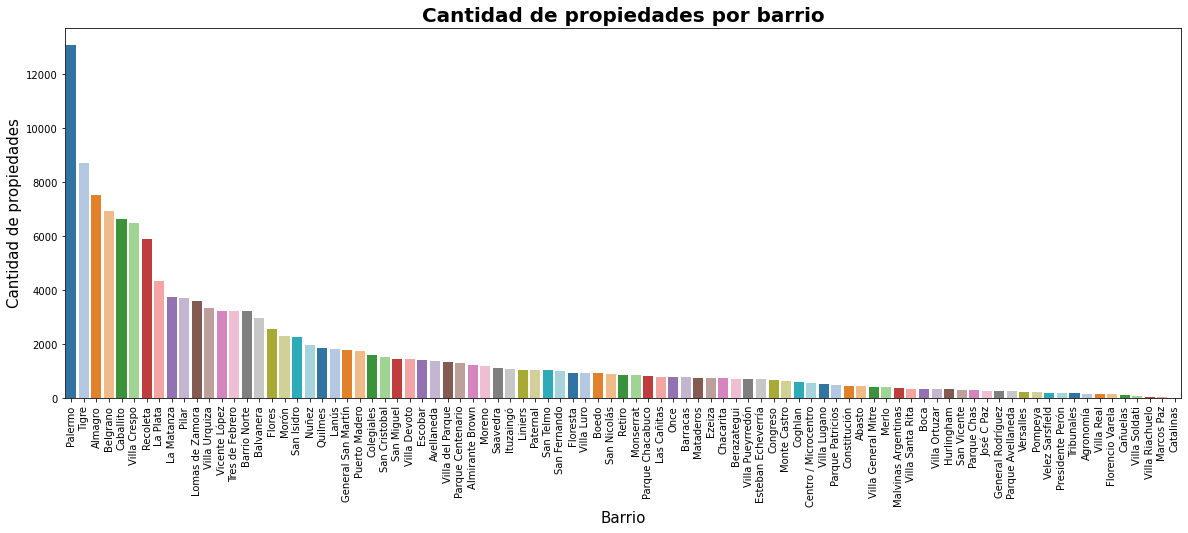

In [10]:
# Ggrafico de propiedades por barrio
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
ax2 = sns.countplot(x='l3',data=df_properati,palette="tab20",order= df_properati['l3'].value_counts().index);
plt.xticks(rotation = 90)
ax2.set_title('Cantidad de propiedades por barrio',fontweight = 'black', fontsize=20);
ax2.set_ylabel('Cantidad de propiedades',fontsize=15);
ax2.set_xlabel('Barrio',fontsize=15);


In [11]:
# Se eliminan aquellas variables que son irrelevantes,ya que no proporcionan información relevante

df_properati = df_properati.drop(columns=["created_on", "l1","end_date", "start_date", "currency", "description", "operation_type", "title"])


In [12]:
df_properati.columns

Index(['lat', 'lon', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'property_type'],
      dtype='object')

In [13]:
# Renombrar variables l2 y l3
df_properati.rename({"l2": "Region","l3": "Barrio"}, axis=1, inplace=True)

In [14]:
# Se filtran los datos por los tipos de propiedad que mas propiedades tienen
df_properati = df_properati[((df_properati.property_type== 'Departamento') | (df_properati.property_type == 'Casa') | (df_properati.property_type == 'PH'))]
print('Dimensiones nuevo data frame: \n',df_properati.shape, sep = "")

Dimensiones nuevo data frame: 
(143145, 11)


In [15]:
# Análisis describtivo de las variables numericas, para ver como es su comportamiento. 
df_properati.describe()

lat            lon          rooms       bedrooms  \
count  133552.000000  133521.000000  143145.000000  143145.000000   
mean      -34.603257     -58.464695       3.096140       1.999490   
std         0.473261       0.491105       1.393088       1.129123   
min       -35.150806    -180.000000       1.000000       0.000000   
25%       -34.626417     -58.503254       2.000000       1.000000   
50%       -34.600658     -58.443272       3.000000       2.000000   
75%       -34.574299     -58.408279       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  138934.000000  124522.000000    124236.000000  1.431450e+05  
mean        1.597715     182.381089       112.374159  2.378184e+05  
std         0.885980    1436.708405       919.025616  2.881004e+05  
min         1.000000      10.000000         1.000000  6.000000e+03  
25%         1.000000      52.000000        47.000000  1.120000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     138.000000       108.000000  2.644650e+05  
max        14.000000  169000.000000    126062.000000  3.243423e+07

**Se puede observar que la desviación estandar de las variables surface_total, surface_covered,price tiene grandes  valores, lo que indica que hay una gran disperción de los datos con respecto a la media.**

# Transformación y tratamiento de datos

En esta sección, se ejecuta todo el preprocesamiento de datos.

In [16]:
'''
En el siguiente codigo se analiza si hay valores en los que la superficie cubierta sean mayores a la superficie total,'''

print('Superficie cubierta mayor a superficie total: \n',pd.value_counts(df_properati.surface_covered > df_properati.surface_total), sep = "")


Superficie cubierta mayor a superficie total: 
False    141725
True       1420
dtype: int64


In [17]:
# Seleccionar los registros donde la superficie total es mayor o igual a la cubierta.

df_properati = df_properati[df_properati.surface_total >= df_properati.surface_covered]

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

Text(0.5, 0, 'Precio (UDS)')

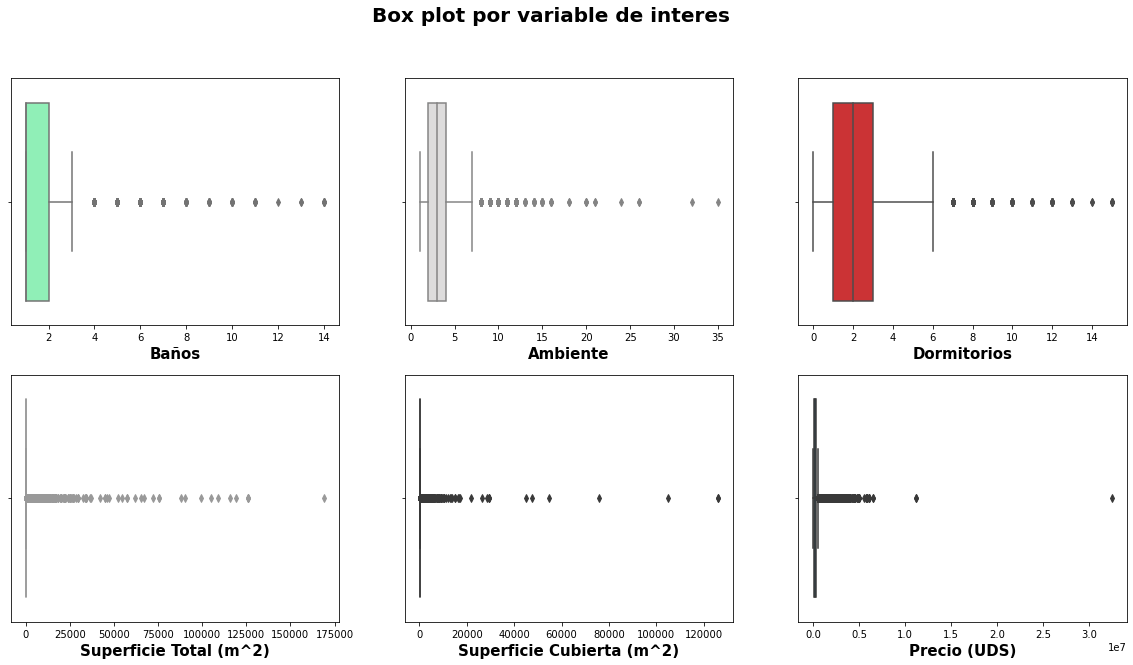

In [18]:
# Diagrama de caja y bigotes para las variables númericas
plt.figure(figsize=(20,10))
plt.suptitle('Box plot por variable de interes' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(df_properati['bathrooms'],palette='rainbow')
plt.xlabel("Baños", fontweight = "black", fontsize = 15)

plt.subplot(2,3,2)
sns.boxplot(df_properati['rooms'],palette='coolwarm')
plt.xlabel("Ambiente", fontweight = "black", fontsize = 15)

plt.subplot(2,3,3)
sns.boxplot(df_properati['bedrooms'],palette='Set1')
plt.xlabel("Dormitorios", fontweight = "black", fontsize = 15)

plt.subplot(2,3,4)
sns.boxplot(df_properati['surface_total'],palette='bwr')
plt.xlabel("Superficie Total (m^2)", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.boxplot(df_properati['surface_covered'],palette='winter')
plt.xlabel("Superficie Cubierta (m^2)", fontweight = "black", fontsize = 15)

plt.subplot(2,3,6)
sns.boxplot(df_properati['price'],palette='winter')
plt.xlabel("Precio (UDS)", fontweight = "black", fontsize = 15)


**Por medio de un grafico Box plot se puede visualizar características importantes como la dispersión y simetría, asi como se puede evidenciar que en el box plot de las variablea analizadas se encuentran muchos datos atipicos y datos dispersos para las superfiscies y el precio**

## Outliers - Valores atípico

Para mejorar la apariencia de las cajas se calcula la mediana de cada variable númerica, ya que muestra la mitad de los casos por encima y a la otra mitad por debajo, se desea conocer la mediana con el fin de sacar el rango intercuartilico de los datos, con el objetivo de ver hasta donde se extienden los valores máximo y mínimo de la serie hasta 1,5 veces el IQR.Cuando los datos se extienden más allá de esto, significa que hay valores atípicos en la serie y entonces hay que calcular los límites superior e inferior para filtar los datos entre el cuartil 1 y el 3, con e fin de remover los valores atípicos que influyen al momento de modelar. 

In [19]:
# mediana de los datos
print('Mediana: \n',df_properati.median(),sep = "")

Mediana: 
lat                   -34.598176
lon                   -58.443019
rooms                   3.000000
bedrooms                2.000000
bathrooms               1.000000
surface_total          78.000000
surface_covered        67.000000
price              170000.000000
dtype: float64


In [20]:
# Se calcula el IQR entre 1 y 3 cuartil con el fin de filtar los datos entre los bigotes de las cajas

Q1 = df_properati.quantile(.25)
Q3 = df_properati.quantile(.75)
IQR = Q3 - Q1
df_properati = df_properati[~ ((df_properati < (Q1 - 1.5 * IQR)) | (df_properati > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [21]:
df_properati.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  77269.000000  77269.000000  83816.000000  83816.000000  82714.000000   
mean     -34.598862    -58.447265      2.774005      1.817004      1.362829   
std        0.029793      0.049022      1.028956      0.864398      0.577907   
min      -34.692633    -58.633000      1.000000      0.000000      1.000000   
25%      -34.614473    -58.472829      2.000000      1.000000      1.000000   
50%      -34.599696    -58.438840      3.000000      2.000000      1.000000   
75%      -34.583652    -58.414506      3.000000      2.000000      2.000000   
max      -34.499092    -58.291787      7.000000      6.000000      3.000000   

       surface_total  surface_covered          price  
count   83816.000000     83816.000000   83816.000000  
mean       77.994261        66.616947  183291.500215  
std        42.085887        31.530254   93156.603401  
min        10.000000         1.000000    6000.000000  
25%        48.000000        43.000000  114000.000000  
50%        66.000000        59.000000  160000.000000  
75%        95.000000        81.000000  235000.000000  
max       264.000000       197.000000  497500.000000

Se emplea la regla de las tres sigma com el fin de identificar y detectar los datos atípicos. Ya cuando se indnetifiquen se procede a marcarlos con NaN para que estos no afecten la inmputación mas adelante.

In [22]:
# Con la regla de las 3 sigma, se usan 2.5 sigma para determinar los valores atipícos por columnas

for col in ["surface_covered","bedrooms", "rooms", "price", "surface_total", "bathrooms"]:
    desviacion_estandard = df_properati[col].std()
    media = df_properati[col].mean()

    outliers = (df_properati[col] > (media + (desviacion_estandard*2.5))) | (df_properati[col] < (media - (desviacion_estandard*2.5)))
    df_properati.loc[outliers, col] = np.nan

In [23]:
df_properati.describe()

lat           lon         rooms      bedrooms     bathrooms  \
count  77269.000000  77269.000000  83036.000000  81266.000000  78463.000000   
mean     -34.598862    -58.447265      2.741642      1.743866      1.274129   
std        0.029793      0.049022      0.977007      0.767547      0.446077   
min      -34.692633    -58.633000      1.000000      0.000000      1.000000   
25%      -34.614473    -58.472829      2.000000      1.000000      1.000000   
50%      -34.599696    -58.438840      3.000000      2.000000      1.000000   
75%      -34.583652    -58.414506      3.000000      2.000000      2.000000   
max      -34.499092    -58.291787      5.000000      3.000000      2.000000   

       surface_total  surface_covered          price  
count   80998.000000     81328.000000   81464.000000  
mean       73.321428        63.650465  175519.212560  
std        34.154889        26.871278   82217.852543  
min        10.000000         1.000000    6000.000000  
25%        47.000000        43.000000  111000.000000  
50%        65.000000        58.000000  158000.000000  
75%        91.000000        80.000000  228000.000000  
max       183.000000       145.000000  416172.000000

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

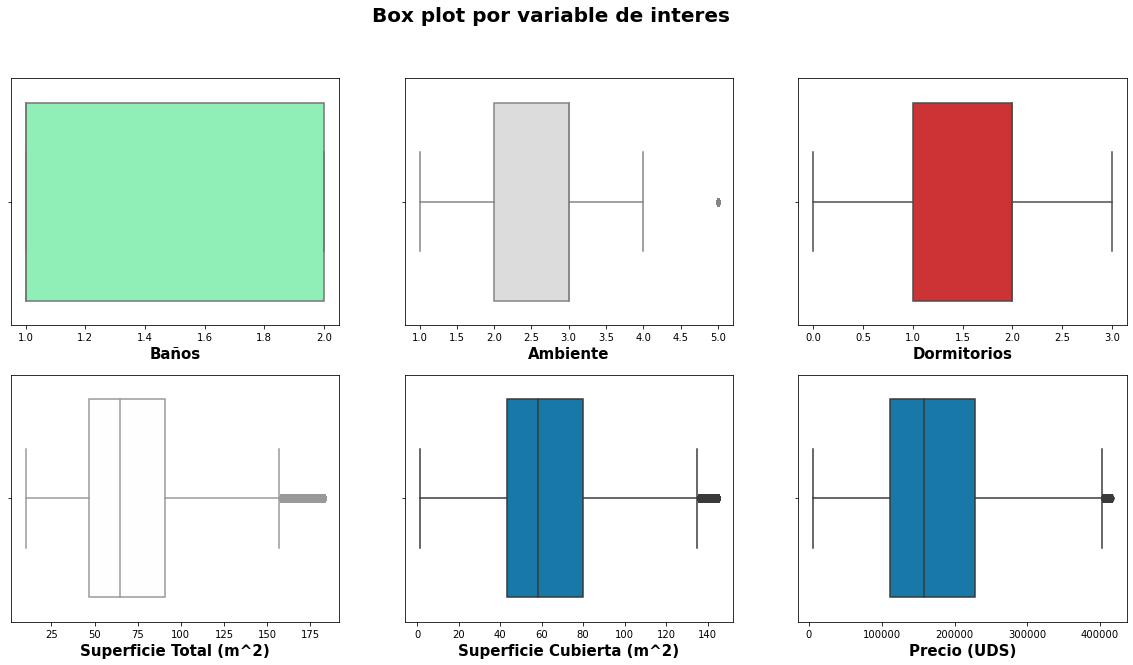

In [24]:
# Diagrama de caja y bigotes con los datos filtrados
plt.figure(figsize=(20,10))
plt.suptitle('Box plot por variable de interes' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.boxplot(df_properati['bathrooms'],palette='rainbow')
plt.xlabel("Baños", fontweight = "black", fontsize = 15)

plt.subplot(2,3,2)
sns.boxplot(df_properati['rooms'],palette='coolwarm')
plt.xlabel("Ambiente", fontweight = "black", fontsize = 15)

plt.subplot(2,3,3)
sns.boxplot(df_properati['bedrooms'],palette='Set1')
plt.xlabel("Dormitorios", fontweight = "black", fontsize = 15)

plt.subplot(2,3,4)
sns.boxplot(df_properati['surface_total'],palette='bwr')
plt.xlabel("Superficie Total (m^2)", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.boxplot(df_properati['surface_covered'],palette='winter')
plt.xlabel("Superficie Cubierta (m^2)", fontweight = "black", fontsize = 15)

plt.subplot(2,3,6)
sns.boxplot(df_properati['price'],palette='winter')
plt.xlabel("Precio (UDS)", fontweight = "black", fontsize = 15);


Al filtrar los datos teniendo en cuenta el IQR y al marcar los tados atipicos resultantes de dicho filtro y la implmentación de la rega de las 3 sigma para marcar dichos atipicos, se puede observar que mejora la apariencia de las cajas, y se puede observar que los datos estan menos dispersos y la distribución es mucho mejor. Ademas, se nota los datos atípicos que quedaron por fuera de implementar dicha tecnica.

## Inputación de valores faltantes

Se procede a imputar los datos faltantes por la media y la mediana dependiendo si la variable es continua o discreta, esto con el fin de evitar eliminar las filas del data set a las cuales le falta un dato faltante de alguna de las columnas, por tanto se estima los valores ausentes empleando el resto de información disponible, ya que lno es pertinente emplear los algoritmos con aceptan observaciones incompletas

In [25]:
print('Datos faltantes por columna:\n', df_properati.isna().sum(), sep = "")

Datos faltantes por columna:
lat                6547
lon                6547
Region                0
Barrio                0
rooms               780
bedrooms           2550
bathrooms          5353
surface_total      2818
surface_covered    2488
price              2352
property_type         0
dtype: int64


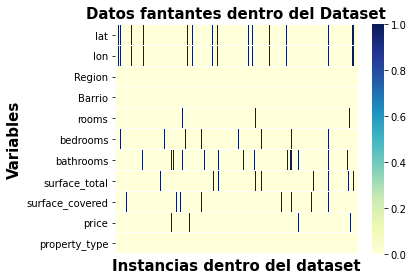

In [26]:
# Grafico para identificar valores faltantes por cada variable
Dat = df_properati.isnull()
heat = sns.heatmap(Dat.T,cmap='YlGnBu',xticklabels= False)
plt.title('Datos fantantes dentro del Dataset' , fontweight = 'black', fontsize=15)
plt.xlabel("Instancias dentro del dataset", fontweight = "black", fontsize = 15)
plt.ylabel("Variables", fontweight = "black", fontsize = 15)
plt.tight_layout()

### Inputación por tipo de propiedad

In [27]:
# Observar la cantidad de datos faltantes que hay de la superficie total por tipo de propiedad
df_properati["surface_total"].isna().groupby(df_properati["property_type"]).sum().sort_values(ascending=False)

property_type
Casa            1091
PH               952
Departamento     775
Name: surface_total, dtype: int64

In [28]:
# Determinar la media de la superficie total por tipo de propiedad para proceder a imputar
media = df_properati[["surface_total","property_type"]].groupby("property_type").agg(pd.Series.mean)
media = media.to_dict()["surface_total"]
media

{'Casa': 133.98427260812582,
 'Departamento': 68.7144810316044,
 'PH': 96.10252302763315}

In [29]:
# Inputación para superficie total
df_properati.set_index("property_type", inplace=True)
df_properati.surface_total.fillna(media, inplace=True)

In [30]:
# Observar la cantidad de datos faltantes que hay de los dormitorios por tipo de propiedad
df_properati.reset_index(inplace=True) # resetear el indice
df_properati["bedrooms"].isna().groupby(df_properati["property_type"]).sum().sort_values(ascending=False)

property_type
Departamento    1152
PH               990
Casa             408
Name: bedrooms, dtype: int64

In [31]:
# Determinar la mediana de los dormitorios por tipo de propiedad, ya que es una variable discreta
mediana = df_properati[["bedrooms","property_type"]].groupby("property_type").agg(pd.Series.median)
mediana = mediana.to_dict()["bedrooms"]
mediana

{'Casa': 3.0, 'Departamento': 2.0, 'PH': 2.0}

In [32]:
# Inputación para dormitorios
df_properati.set_index("property_type", inplace=True)
df_properati.bedrooms.fillna(mediana, inplace=True)

In [33]:
# Observar la cantidad de datos faltantes que hay de los ambientes por tipo de propiedad
df_properati.reset_index(inplace=True) # resetear el indice
df_properati["rooms"].isna().groupby(df_properati["property_type"]).sum().sort_values(ascending=False)

property_type
PH              313
Departamento    284
Casa            183
Name: rooms, dtype: int64

In [34]:
# Determinar la mediana de los ambientes por tipo de propiedad, ya que es una variable discreta
mediana = df_properati[["rooms","property_type"]].groupby("property_type").agg(pd.Series.median)
mediana = mediana.to_dict()["rooms"]
mediana

{'Casa': 4.0, 'Departamento': 3.0, 'PH': 3.0}

In [35]:
# Inputación para ambientes
df_properati.set_index("property_type", inplace=True)
df_properati.rooms.fillna(mediana, inplace=True)

In [36]:
# Observar la cantidad de datos faltantes que hay de los baños por tipo de propiedad
df_properati.reset_index(inplace=True) # resetear el indice
df_properati["bathrooms"].isna().groupby(df_properati["property_type"]).sum().sort_values(ascending=False)

property_type
Departamento    4368
PH               628
Casa             357
Name: bathrooms, dtype: int64

In [37]:
# Determinar la mediana de los baños por tipo de propiedad, ya que es una variable discreta
mediana = df_properati[["bathrooms","property_type"]].groupby("property_type").agg(pd.Series.median)
mediana = mediana.to_dict()["bathrooms"]
mediana

{'Casa': 1.0, 'Departamento': 1.0, 'PH': 1.0}

In [38]:
# Inputación para los baños
df_properati.set_index("property_type", inplace=True)
df_properati.bathrooms.fillna(mediana, inplace=True)

### Inputación con variables númericas

In [39]:
# Determinar la media del precio por superficie total
media = df_properati[["price","surface_total"]].groupby("surface_total").agg(pd.Series.mean)
media = media.to_dict()["price"]
media

{10.0: 68000.0,
 11.0: 139000.0,
 12.0: 24200.0,
 13.0: 16500.0,
 14.0: 28740.0,
 15.0: 38875.0,
 16.0: 38555.555555555555,
 17.0: 53035.454545454544,
 18.0: 53443.681818181816,
 19.0: 58632.46666666667,
 20.0: 64025.59154929577,
 21.0: 61898.74545454545,
 22.0: 64032.32608695652,
 23.0: 69252.8090909091,
 24.0: 67843.07692307692,
 25.0: 69500.57872340425,
 26.0: 70242.55,
 27.0: 73356.96464646465,
 28.0: 75512.06463878327,
 29.0: 81526.6179245283,
 30.0: 83954.42045454546,
 31.0: 82865.46648793566,
 32.0: 85620.99673202615,
 33.0: 90939.58186738836,
 34.0: 93766.7740029542,
 35.0: 93983.28960645813,
 36.0: 94151.76657060519,
 37.0: 99106.64995602463,
 38.0: 101413.303806735,
 39.0: 109136.64097363083,
 40.0: 107357.31279904307,
 41.0: 109020.63529411764,
 42.0: 110950.12294182218,
 43.0: 117829.16242038217,
 44.0: 111816.19894736842,
 45.0: 115748.72360069244,
 46.0: 124254.06374881066,
 47.0: 125375.60053859964,
 48.0: 131042.53663500678,
 49.0: 127893.0067961165,
 50.0: 135464.91327

In [40]:
# Inputación para el precio
df_properati.reset_index(inplace=True) # resetear el indice
df_properati.set_index("surface_total", inplace=True)
df_properati.price.fillna(media, inplace=True)

In [41]:
# Determinar la media de la superficie cubierta por la cantida de dormitorios
media = df_properati[["surface_covered","bedrooms"]].groupby("bedrooms").agg(pd.Series.mean)
media = media.to_dict()["surface_covered"]
media

{0.0: 32.82299270072993,
 1.0: 43.161635309096056,
 2.0: 71.71759992245306,
 3.0: 97.57296700262322}

In [42]:
# Inputación para el precio
df_properati.reset_index(inplace=True) # resetear el indice
df_properati.set_index("bedrooms", inplace=True)
df_properati.surface_covered.fillna(media, inplace=True)

## Remover valores faltantes

Se remueven los datos faltantes que no fueron inputados, ya que corresponden a datos de latitud y longitud que son de georeferencición, con la media y la mediana no tendrian sentido inputarlos, por tal motivo se re remueven aquellas localizaciones que no se tienen.

In [43]:
df_properati.reset_index(inplace=True)

In [44]:
print('Porcentaje de valores faltantes por columna:\n',df_properati.isna().sum() / df_properati.shape[0] * 100, sep = "")

Porcentaje de valores faltantes por columna:
bedrooms           0.000000
surface_total      0.000000
property_type      0.000000
lat                7.811158
lon                7.811158
Region             0.000000
Barrio             0.000000
rooms              0.000000
bathrooms          0.000000
surface_covered    0.000000
price              0.000000
dtype: float64


In [45]:
df_properati.dropna(inplace=True)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

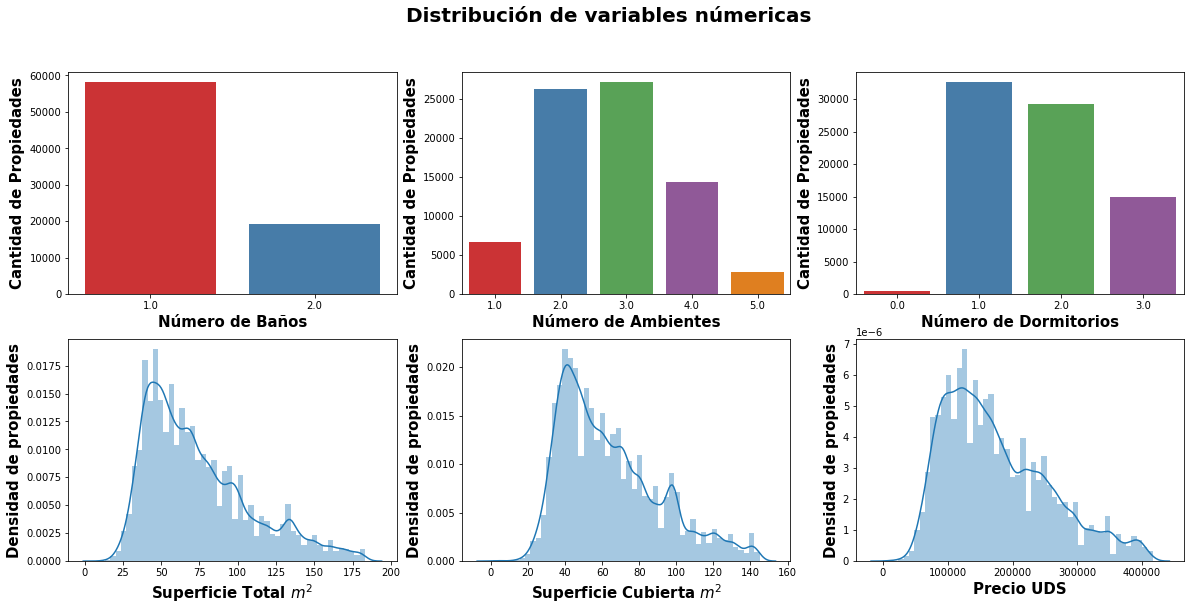

In [46]:
# Se muestra la distribución de las variables númericas discretas y continuas

plt.figure(figsize=(20,9))
plt.suptitle('Distribución de variables númericas' , fontweight = 'black', fontsize=20)

plt.subplot(2,3,1)
sns.countplot(x='bathrooms',data = df_properati,palette="Set1")
plt.xlabel("Número de Baños", fontweight = "black", fontsize = 15)
plt.ylabel("Cantidad de Propiedades", fontweight = "black", fontsize = 15)

plt.subplot(2,3,2)
sns.countplot(x='rooms',data = df_properati,palette="Set1")
plt.xlabel("Número de Ambientes", fontweight = "black", fontsize = 15)
plt.ylabel("Cantidad de Propiedades", fontweight = "black", fontsize = 15)


plt.subplot(2,3,3)
sns.countplot(x='bedrooms',data = df_properati,palette="Set1")
plt.xlabel("Número de Dormitorios", fontweight = "black", fontsize = 15)
plt.ylabel("Cantidad de Propiedades", fontweight = "black", fontsize = 15)

plt.subplot(2,3,4)
sns.distplot(df_properati['surface_total']);
plt.xlabel("Superficie Total $m^{2}$", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de propiedades", fontweight = "black", fontsize = 15)

plt.subplot(2,3,5)
sns.distplot(df_properati['surface_covered']);
plt.xlabel("Superficie Cubierta $m^{2}$", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de propiedades", fontweight = "black", fontsize = 15)

plt.subplot(2,3,6)
sns.distplot(df_properati['price']);
plt.xlabel("Precio UDS", fontweight = "black", fontsize = 15)
plt.ylabel("Densidad de propiedades", fontweight = "black", fontsize = 15);


Se puede observar que para la distribución de las variables continuas la distribución muestra una asimetría positiva, ya que la cola de la distribución se alarga (a la derecha) para valores superiores a la media y el nivel de curtosis muestra un grado de concentración de los datos de forma mesoocúrtica, lo que indica que tienen una concentración normal

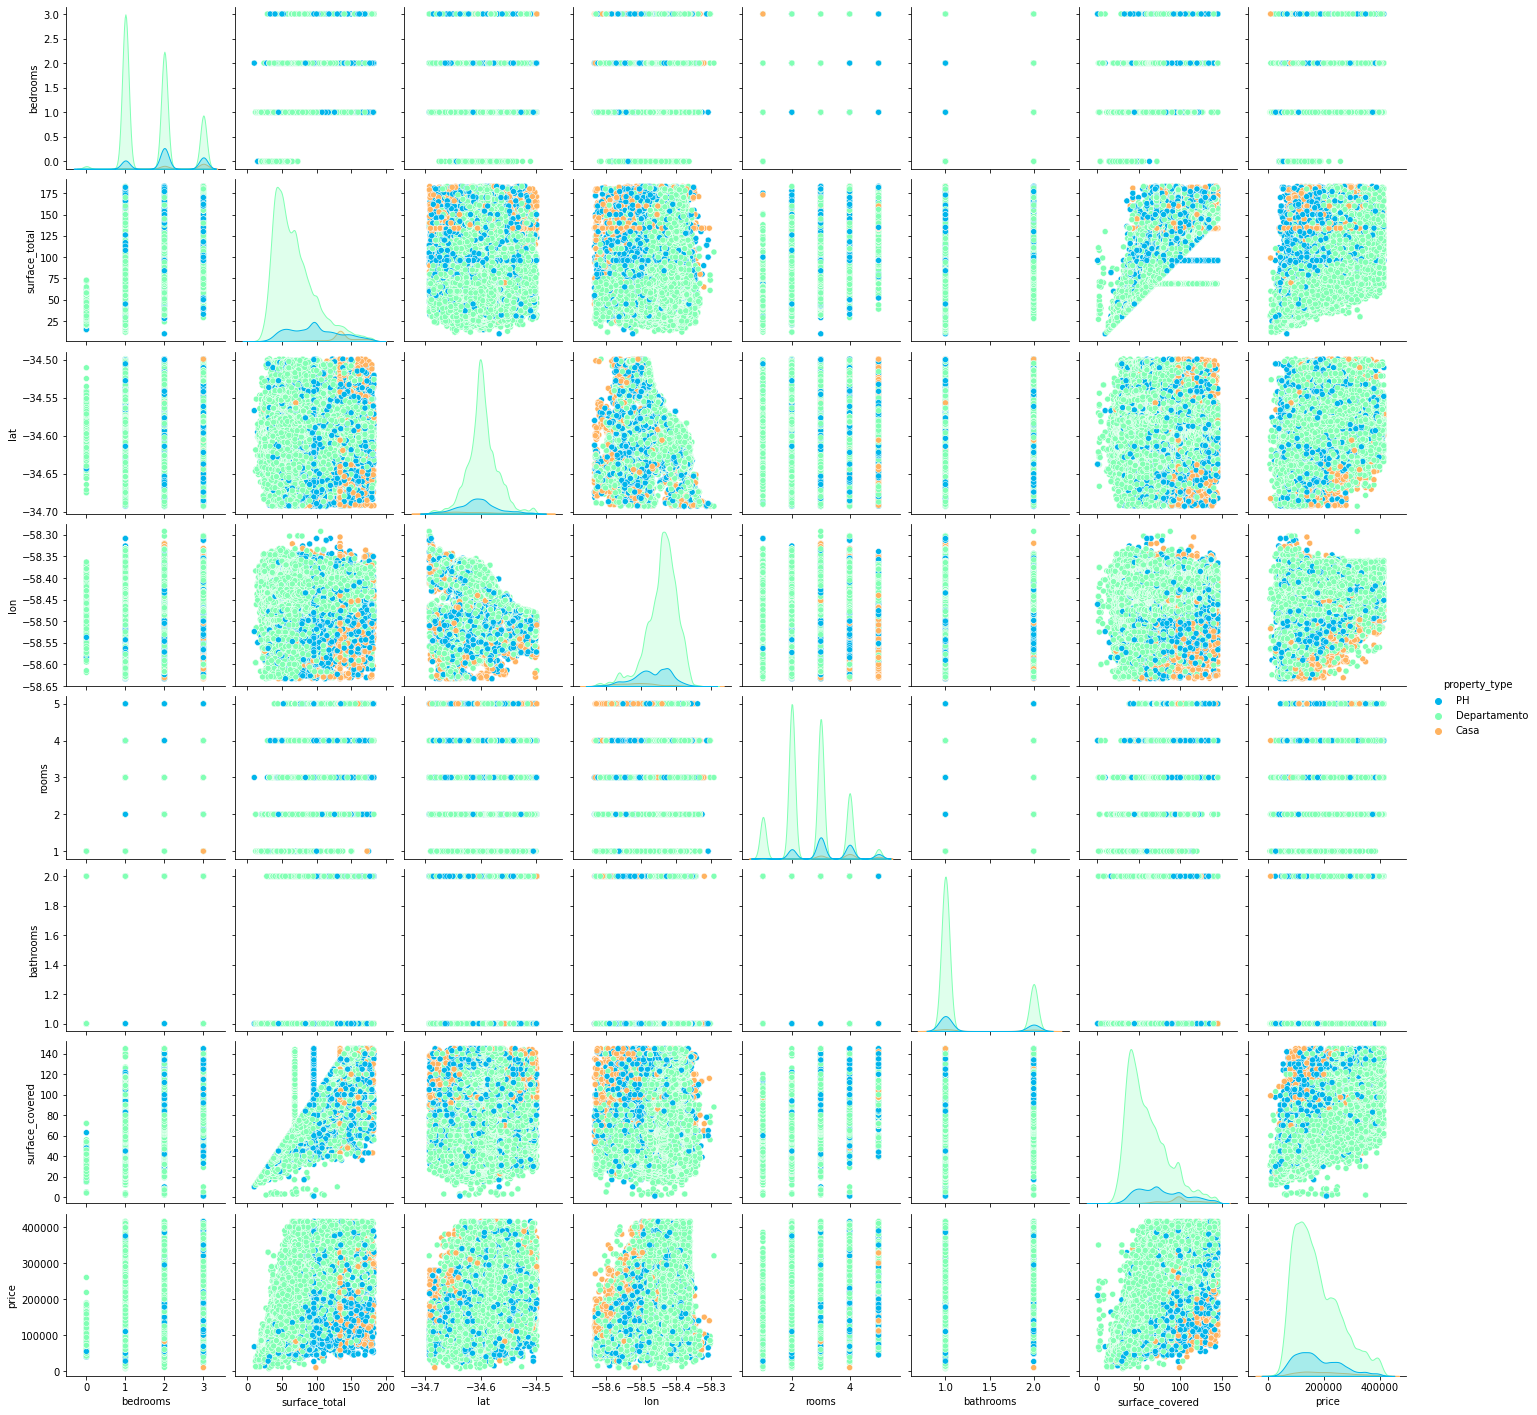

In [47]:
# se realiza el pairplot con la variable tipo de propiedad.

sns.pairplot(df_properati,hue='property_type',palette = 'rainbow');


Con el pairplot se puede iniciar a observar distribución de las variables, así como las que tienden a tener relación con la variable objetivo en el proyecto (precio)

## Encoding

Se emplea codificación con el fin de agregar mayor cantidad de variables en los modelos para la predicción, de esta forma, se transforman variables de interes para crear variables dummy, que permite convertir categoría a número y así poder utilizar las nuevas variables como variables predictoras en el modelo.Es decir, la binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas.

In [48]:
# Codificación de la variable categoríca tipo de propiedad
df_properati = pd.get_dummies(df_properati, columns=["property_type"])
df_properati.head()

bedrooms  surface_total        lat        lon           Region  \
0       1.0           70.0 -34.624056 -58.412110  Capital Federal   
1       1.0           45.0 -34.593569 -58.427474  Capital Federal   
2       1.0           85.0 -34.581294 -58.436754  Capital Federal   
3       1.0           56.0 -34.593779 -58.441239  Capital Federal   
4       1.0           70.0 -34.600988 -58.433061  Capital Federal   

         Barrio  rooms  bathrooms  surface_covered     price  \
0         Boedo    2.0        2.0             58.0  159000.0   
1       Palermo    2.0        1.0             45.0  125000.0   
2       Palermo    2.0        1.0             50.0  295000.0   
3  Villa Crespo    2.0        1.0             56.0  150000.0   
4  Villa Crespo    2.0        1.0             70.0  159500.0   

   property_type_Casa  property_type_Departamento  property_type_PH  
0                   0                           0                 1  
1                   0                           0                 1  
2                   0                           0                 1  
3                   0                           0                 1  
4                   0                           0                 1

In [49]:
# Codificación para las tres regiones con mayor cantidad de pripiedades en venta 
region3 = df_properati.Region.value_counts().sort_values(ascending=False).iloc[:3].to_dict() # seleccionar las 3 regiones con más propiedades
region3 = { k:k for k in region3.keys() }
df_properati.Region = df_properati.Region.map(region3)
df_properati = pd.get_dummies(df_properati, columns=["Region"])# Variables dummy
df_properati.head()

bedrooms  surface_total        lat        lon        Barrio  rooms  \
0       1.0           70.0 -34.624056 -58.412110         Boedo    2.0   
1       1.0           45.0 -34.593569 -58.427474       Palermo    2.0   
2       1.0           85.0 -34.581294 -58.436754       Palermo    2.0   
3       1.0           56.0 -34.593779 -58.441239  Villa Crespo    2.0   
4       1.0           70.0 -34.600988 -58.433061  Villa Crespo    2.0   

   bathrooms  surface_covered     price  property_type_Casa  \
0        2.0             58.0  159000.0                   0   
1        1.0             45.0  125000.0                   0   
2        1.0             50.0  295000.0                   0   
3        1.0             56.0  150000.0                   0   
4        1.0             70.0  159500.0                   0   

   property_type_Departamento  property_type_PH  \
0                           0                 1   
1                           0                 1   
2                           0                 1   
3                           0                 1   
4                           0                 1   

   Region_Bs.As. G.B.A. Zona Norte  Region_Bs.As. G.B.A. Zona Oeste  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Region_Capital Federal  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1

In [50]:
# Codificación para los 10 barrios que tienen con mayor cantidad de pripiedades en venta 
barrio10 = df_properati.Barrio.value_counts().sort_values(ascending=False).iloc[:10].to_dict() # seleccionar los 10 barrios con más propiedades
barrio10 = { k:k for k in barrio10.keys() }
df_properati.Barrio = df_properati.Barrio.map(barrio10)
df_properati = pd.get_dummies(df_properati, columns=["Barrio"])# Variables dummy
df_properati.head()

bedrooms  surface_total        lat        lon  rooms  bathrooms  \
0       1.0           70.0 -34.624056 -58.412110    2.0        2.0   
1       1.0           45.0 -34.593569 -58.427474    2.0        1.0   
2       1.0           85.0 -34.581294 -58.436754    2.0        1.0   
3       1.0           56.0 -34.593779 -58.441239    2.0        1.0   
4       1.0           70.0 -34.600988 -58.433061    2.0        1.0   

   surface_covered     price  property_type_Casa  property_type_Departamento  \
0             58.0  159000.0                   0                           0   
1             45.0  125000.0                   0                           0   
2             50.0  295000.0                   0                           0   
3             56.0  150000.0                   0                           0   
4             70.0  159500.0                   0                           0   

   ...  Barrio_Almagro  Barrio_Balvanera  Barrio_Barrio Norte  \
0  ...               0                 0                    0   
1  ...               0                 0                    0   
2  ...               0                 0                    0   
3  ...               0                 0                    0   
4  ...               0                 0                    0   

   Barrio_Belgrano  Barrio_Caballito  Barrio_Palermo  Barrio_Recoleta  \
0                0                 0               0                0   
1                0                 0               1                0   
2                0                 0               1                0   
3                0                 0               0                0   
4                0                 0               0                0   

   Barrio_Vicente López  Barrio_Villa Crespo  Barrio_Villa Urquiza  
0                     0                    0                     0  
1                     0                    0                     0  
2                     0                    0                     0  
3                     0                    1                     0  
4                     0                    1                     0  

[5 rows x 24 columns]

In [51]:
df_properati.shape

(77269, 24)

## Escalado de datos

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo aplicado, ya que pueden ser sencibles a esto.

Se estandarizan todas las variables predictoras del dataset, con el objetivo de evitar confusión en los modelos a aplicar, ocasionados por la esacala de las variables.Por tal motivo, se normalizan los datos, de forma que todos los predictores estén aproximadamente en la misma escala.

In [52]:
# Importar escalador
from sklearn.preprocessing import StandardScaler

In [53]:
# Separar variables predictoras de la variable objetivo(precio)
X = df_properati.drop(columns=["price"])
y = df_properati.price

In [54]:
X.head()

bedrooms  surface_total        lat        lon  rooms  bathrooms  \
0       1.0           70.0 -34.624056 -58.412110    2.0        2.0   
1       1.0           45.0 -34.593569 -58.427474    2.0        1.0   
2       1.0           85.0 -34.581294 -58.436754    2.0        1.0   
3       1.0           56.0 -34.593779 -58.441239    2.0        1.0   
4       1.0           70.0 -34.600988 -58.433061    2.0        1.0   

   surface_covered  property_type_Casa  property_type_Departamento  \
0             58.0                   0                           0   
1             45.0                   0                           0   
2             50.0                   0                           0   
3             56.0                   0                           0   
4             70.0                   0                           0   

   property_type_PH  ...  Barrio_Almagro  Barrio_Balvanera  \
0                 1  ...               0                 0   
1                 1  ...               0                 0   
2                 1  ...               0                 0   
3                 1  ...               0                 0   
4                 1  ...               0                 0   

   Barrio_Barrio Norte  Barrio_Belgrano  Barrio_Caballito  Barrio_Palermo  \
0                    0                0                 0               0   
1                    0                0                 0               1   
2                    0                0                 0               1   
3                    0                0                 0               0   
4                    0                0                 0               0   

   Barrio_Recoleta  Barrio_Vicente López  Barrio_Villa Crespo  \
0                0                     0                    0   
1                0                     0                    0   
2                0                     0                    0   
3                0                     0                    1   
4                0                     0                    1   

   Barrio_Villa Urquiza  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 23 columns]

In [55]:
# Escalado de los datos 
escalador = StandardScaler() # escalador
X_escalada = escalador.fit_transform(X) # escalar todas las variables predictoras
X_escalada

array([[-0.99225629, -0.11201085, -0.8456303 , ..., -0.17511596,
        -0.28122153, -0.1931863 ],
       [-0.99225629, -0.8411946 ,  0.17766375, ..., -0.17511596,
        -0.28122153, -0.1931863 ],
       [-0.99225629,  0.32549939,  0.58967532, ..., -0.17511596,
        -0.28122153, -0.1931863 ],
       ...,
       [-0.99225629, -1.04536605,  0.55832862, ..., -0.17511596,
        -0.28122153, -0.1931863 ],
       [-0.99225629, -0.8411946 , -0.5030017 , ..., -0.17511596,
        -0.28122153, -0.1931863 ],
       [ 0.31756948,  2.54221798, -0.11837611, ..., -0.17511596,
        -0.28122153, -0.1931863 ]])

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


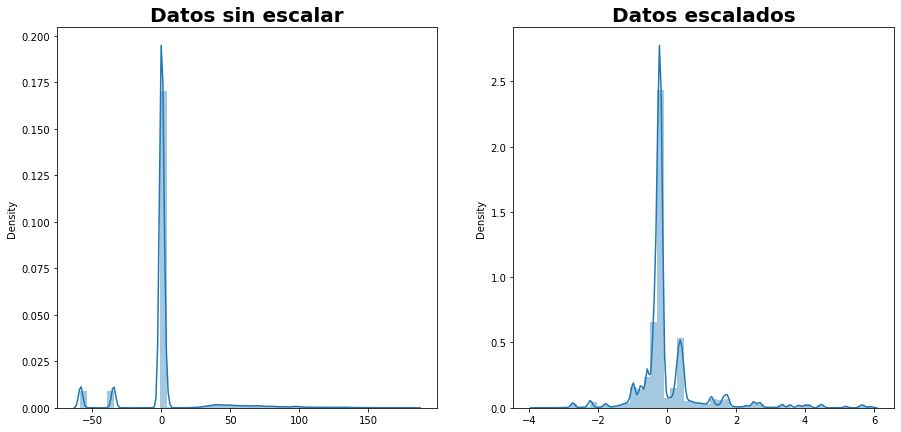

In [56]:
# Comparación entre los datos sin escalar y los datos escalados
plt.figure(figsize=(15,7))

# Datos sin escalar
plt.subplot(1,2,1)
sns.distplot(X)
plt.title('Datos sin escalar' , fontweight = 'black', fontsize=20)

#Datos escalados
plt.subplot(1,2,2)
sns.distplot(X_escalada)
plt.title('Datos escalados' , fontweight = 'black', fontsize=20);

Se puede observar que los datos escalados estan normalizados y se asemejan a la curva teorica de la campana de gauss, es decir que se ven distribuidos normalmente.

Se seleccionan 20 componentes para implementar la reducción de la dimensionalidad.

## Comparación con árbol de decisión sprint 1

Se compara el preprosesamiento que se desarrolla en el presente proyecto con el árbol de decisión implementado en el sprint 1, el cual se ejecuto coon una profundidad 10 y fue el mejor modelo de los que se tuvieron en el primer sprint. El objetivo es evaluar el mismo árbol con las mismas metricas de evaluación, pero con los datos prepropcesados y transformasdos en los apartados de arriba

In [57]:
# importar herramientas que se requieren
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_escalada, y,test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54088, 23) (54088,) (23181, 23) (23181,)


In [59]:
#Creación del modelo del árbol
modelo_tree_regressor =  DecisionTreeRegressor(max_depth=10)

In [60]:
# Función de evaluación

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crear función para evaluar el modelo
def show_scores(X_train, X_test, y_train, y_test,modelo):
    modelo.fit(X_train, y_train)
    y_train_preds = modelo.predict(X_train)
    y_test_preds = modelo.predict(X_test)
    scores = {"Error Absoluto Medio train (MAE)": mean_absolute_error(y_train, y_train_preds),
              "Error Absoluto Medio test (MAE)": mean_absolute_error(y_test, y_test_preds),
              "Raíz del error cuadrático medio en train (RMSE)": np.sqrt(mean_squared_error(y_train, y_train_preds)),
              "Raíz del error cuadrático medio en test (RMSE)": np.sqrt(mean_squared_error(y_test, y_test_preds)),
              "Train R^2": modelo.score(X_train, y_train),
              "Test R^2": modelo.score(X_test, y_test)}
    
    return scores


show_scores(X_train, X_test, y_train, y_test,modelo_tree_regressor)

{'Error Absoluto Medio train (MAE)': 25946.303740851406,
 'Error Absoluto Medio test (MAE)': 27660.646677611792,
 'Raíz del error cuadrático medio en train (RMSE)': 36725.17757566022,
 'Raíz del error cuadrático medio en test (RMSE)': 39158.84571621568,
 'Train R^2': 0.7977823842003187,
 'Test R^2': 0.7720019986575808}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


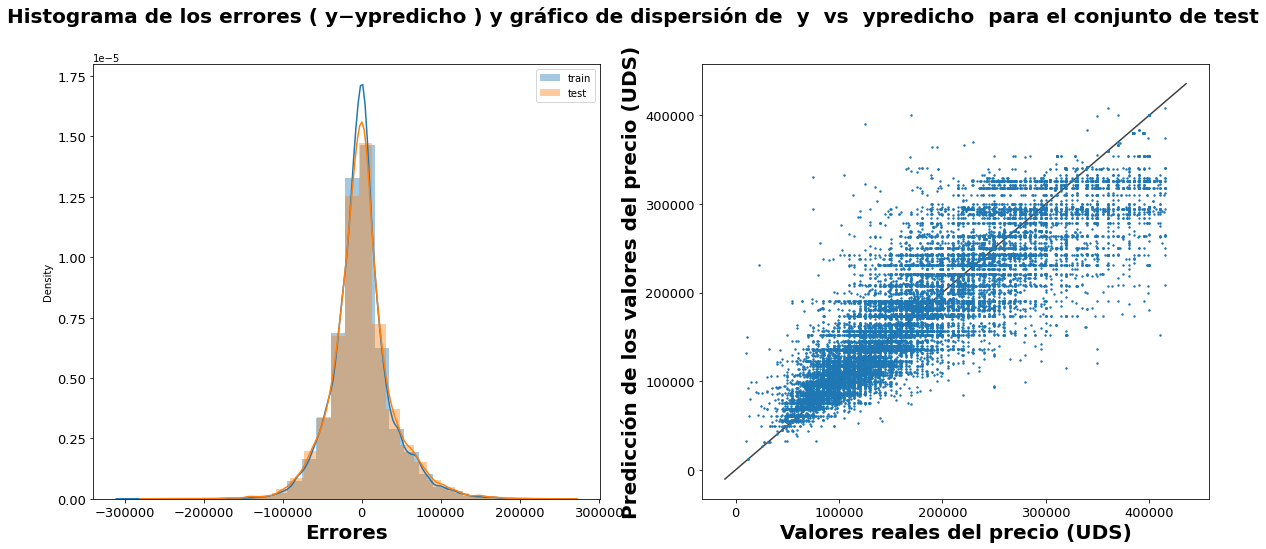

In [61]:
#Función de grafico de valores reales vs predichos
# Se grafican los valores reales del precio contra los valores predichos, con el fin de comparar sus resultados.

def show_graficos(X_train, X_test, y_train, y_test,modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    plt.figure(figsize = (20,8))

    plt.suptitle('Histograma de los errores ( y−ypredicho ) y gráfico de dispersión de  y  vs  ypredicho  para el conjunto de test' , fontweight = 'black', fontsize=20)


    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.xlabel('Errores', fontsize=20,fontweight = 'black')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)       
    plt.xlabel('Valores reales del precio (UDS)',fontsize=20,fontweight = 'black')
    plt.ylabel('Predicción de los valores del precio (UDS)',fontsize=20,fontweight = 'black')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    
    return
    plt.tight_layout()
    plt.show() 
    
show_graficos(X_train, X_test, y_train, y_test,modelo_tree_regressor)

Empleando las mismas condiciones que se tivieron en el primer sprint, se puede observar una gran mejoria con respecto a las eerores del primer sprint. A continuación, se procede a identificar cual es el mejor parametro para este modelo, ya que la profundidad que se tuvo encuenta fue la de la optimización del sprint anterior. Por tal motivo, se identificara que profundidad se ajusta mejor a este modelo.

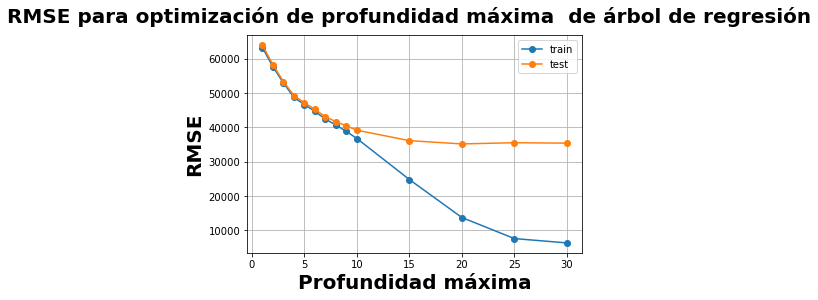

In [62]:
# Optimización de la profundidad del árbol, con el fin de elegir un hiperpárametro que mejore el modelo con el rmse
lista_treermse_train = []
lista_treermse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]
 
for item in max_depths:
    
    model_tree = DecisionTreeRegressor(max_depth = item)
    
    model_tree.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = model_tree.predict(X_train)
    train_tree_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = model_tree.predict(X_test)
    test_tree_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_treermse_train.append(train_tree_rmse)
    lista_treermse_test.append(test_tree_rmse)
    
plt.suptitle('RMSE para optimización de profundidad máxima  de árbol de regresión' , fontweight = 'black', fontsize=20)
plt.plot(max_depths,lista_treermse_train,'o-',label='train' )
plt.plot(max_depths,lista_treermse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel('Profundidad máxima',fontsize=20,fontweight = 'black')
plt.ylabel('RMSE',fontsize=20,fontweight = 'black');

Teniendo en cuneta RMSE se elige un árbol con 13 de profundidad, con el fin de reducuir la raíz del error cuadrático medio y de aumentar el coeficiente de correlación, evitando el sobre ajuste. 

In [63]:
# Se crea un arbol d profundidad de 13
modelo_tree_regressor =  DecisionTreeRegressor(max_depth=13)
show_scores(X_train, X_test, y_train, y_test,modelo_tree_regressor)

{'Error Absoluto Medio train (MAE)': 19648.3216122146,
 'Error Absoluto Medio test (MAE)': 24463.948656263303,
 'Raíz del error cuadrático medio en train (RMSE)': 29952.7599349203,
 'Raíz del error cuadrático medio en test (RMSE)': 37206.88668433659,
 'Train R^2': 0.8654868111941896,
 'Test R^2': 0.7941656084940887}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


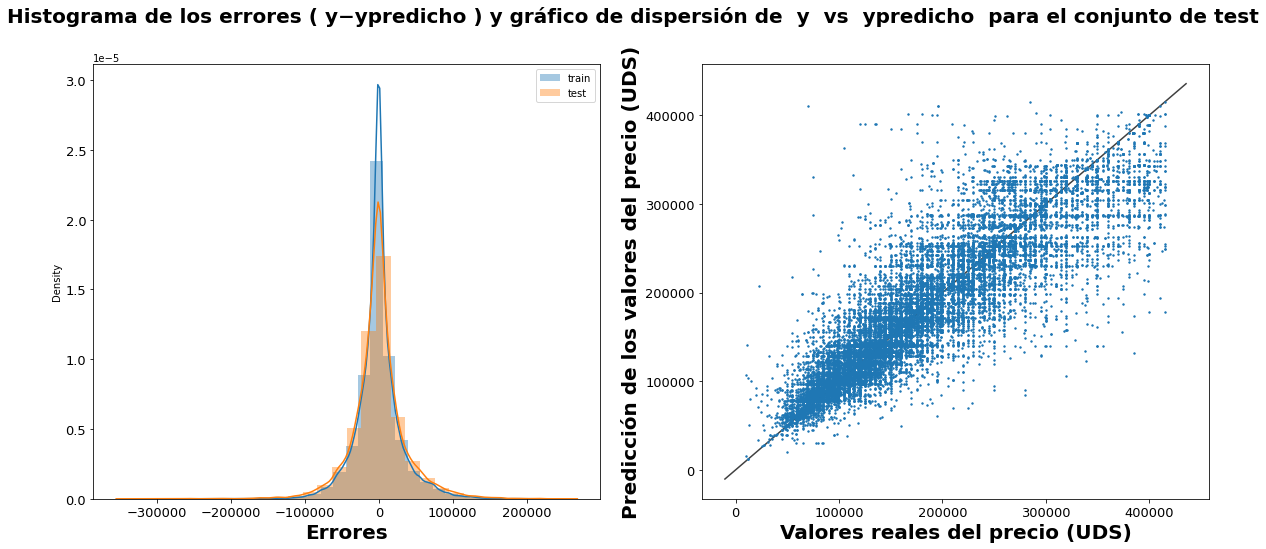

In [64]:
show_graficos(X_train, X_test, y_train, y_test,modelo_tree_regressor)

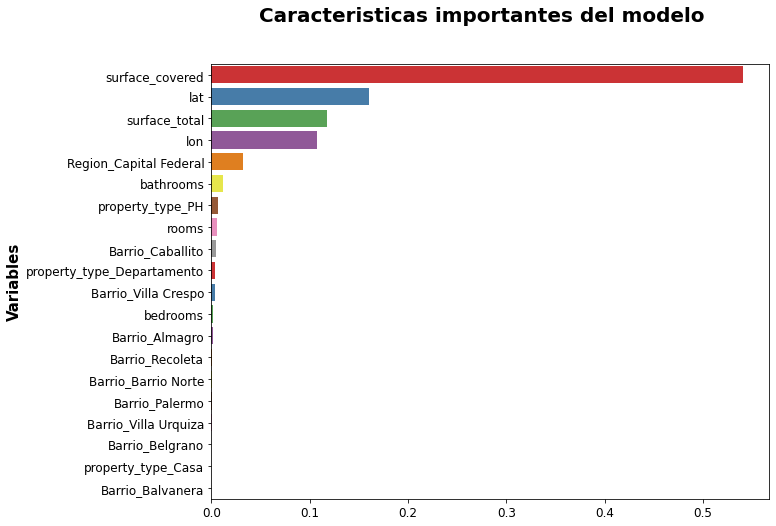

In [65]:
#Funcion para mostrar las caracteriticas importants del modelo
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"Caracteristicas": columns,
                        "": importances})
          .sort_values("", ascending=False))
    
    plt.figure(figsize = (10,8))
    sns.barplot(x="",
                y="Caracteristicas",
                data=df[:n],
                orient="h",
                palette="Set1")
    plt.ylabel("Variables", fontweight = "black", fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.suptitle('Caracteristicas importantes del modelo' , fontweight = 'black', fontsize=20)
    
plot_features(X.columns, modelo_tree_regressor.feature_importances_)

Se pueder ver que las caracteristicas mas importantes en este modelo de árbol de regresión son la superficie cubierta que tine mas del 50% de importancia, seguida de la latitud, superficie total y longitud respectivamente.

In [66]:
comparacion = {"Modelo":["Árbol de decisión Sprint 1", "Árbol de decisión Sprint 2"], 
           "Hiper-parámetros":["profundidad máxima = 10", "profundidad máxima = 13"], 
           "Variables Predictoras": [62, 23],
           "MA (test)": ["~54000", "~24400"],
           "RMSE (test)":["~120000", "~37000"], 
           "$R^{2}$ (test)":["84%", "79%"]}
pd.DataFrame(comparacion)

Modelo         Hiper-parámetros  Variables Predictoras  \
0  Árbol de decisión Sprint 1  profundidad máxima = 10                     62   
1  Árbol de decisión Sprint 2  profundidad máxima = 13                     23   

  MA (test) RMSE (test) $R^{2}$ (test)  
0    ~54000     ~120000            84%  
1    ~24400      ~37000            79%

Al comparar el modelo de árbol del proyecto del sprint 1, se puede decir que que con el preprocesamiento y transformación de los datos implementados en el presente proyecto, empleando las mismas condiciones, con una profundidad de 13, el modelo de árbol contruido en este proyecto predice mejor que el anterior,teniendo menos variables precictoras, lo que quiere decir que el preprocesamiento fue de gran utilidad, ya que los errores RMSE y MAE disminuyen, pasando de ~120000 y ~54000	a ~37000 y ~24400 respectivamente. Ademas, se puede ver que en el  grafico de dispersión los datos no se encuentran dispersos y tienden ajustarse a la linea recta. De igual forma en el histograma de errores los datos se encuentran bien distribuidos.

# Modelos Avanzados

En esta sección, se implementan modelos avanzados de ML, de igual forma se evaluan dichos modelos con validación cruzada y se optimizan hiperparámetros.

## Regresión lineal con atriutos polinómicos y regularización
Se implementa una regresión lineal donde se implementan inicialmente 2 atrobutos polinómico. Ademas, se emplea la regularización con el fin de de evitar el overfitting

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_escalada, y,test_size=0.30)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54088, 23) (54088,) (23181, 23) (23181,)


In [68]:
#Atributos polinómicos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poli = PolynomialFeatures(degree = 2, include_bias=False)  # no incluye bias
X_train_new = poli.fit_transform(X_train)
X_test_new = poli.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(54088, 299) (23181, 299)


In [69]:
# Regresión lineal
modelo_regr = LinearRegression()
show_scores(X_train_new, X_test_new, y_train, y_test,modelo_regr)

{'Error Absoluto Medio train (MAE)': 30483.12519320429,
 'Error Absoluto Medio test (MAE)': 30436.524743787366,
 'Raíz del error cuadrático medio en train (RMSE)': 41631.99985609903,
 'Raíz del error cuadrático medio en test (RMSE)': 41581.605160076906,
 'Train R^2': 0.7401997798294964,
 'Test R^2': 0.7428215056080825}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


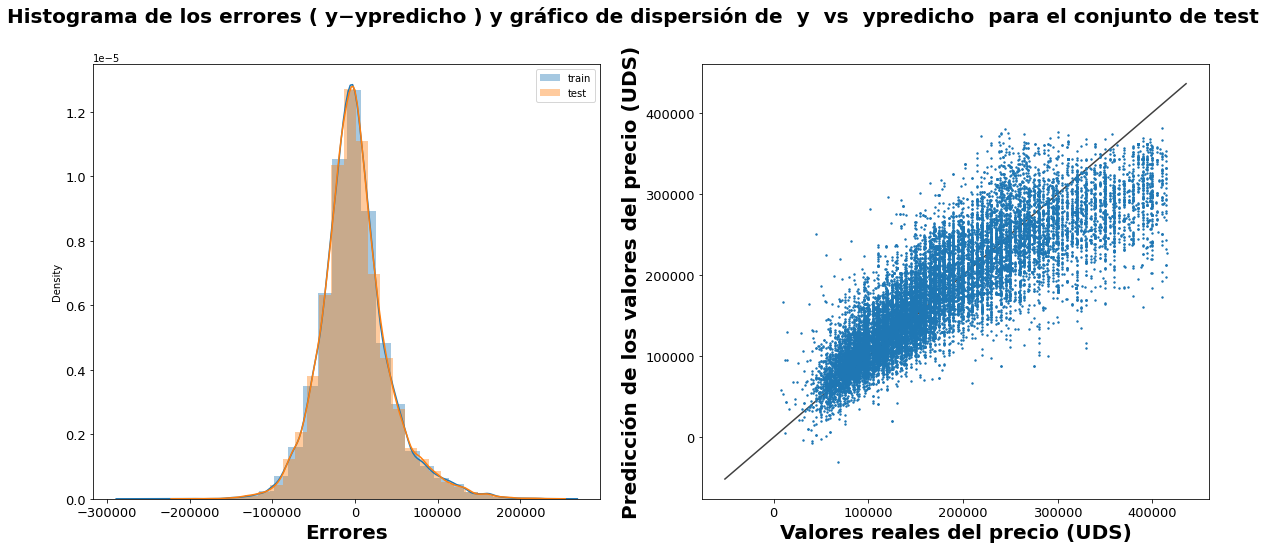

In [70]:
show_graficos(X_train_new, X_test_new, y_train, y_test,modelo_regr)

Al observar las metrricas de evaluación y el grafico de los errores, se puede ver que el modelo de regresión con atributos polinómicos de grado 2 está memorizando las predicciones train en el test, para evitar el “overfitting”, se procede hacer regularización. Donde se emplea regularización Ridge y Lasso, con el objetivo de ver con cual se comporta mejor el modelo.

In [71]:
from sklearn.linear_model import Ridge, Lasso

# regularización ridge con un alpha de 0.001
reg_ridge = Ridge(alpha= 0.001)

In [72]:
# Metrícas regularización ridge
show_scores(X_train_new, X_test_new, y_train, y_test,reg_ridge)

{'Error Absoluto Medio train (MAE)': 30483.07427661087,
 'Error Absoluto Medio test (MAE)': 30436.482254754603,
 'Raíz del error cuadrático medio en train (RMSE)': 41632.00100707836,
 'Raíz del error cuadrático medio en test (RMSE)': 41581.63611250198,
 'Train R^2': 0.7401997654643595,
 'Test R^2': 0.7428211227320001}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


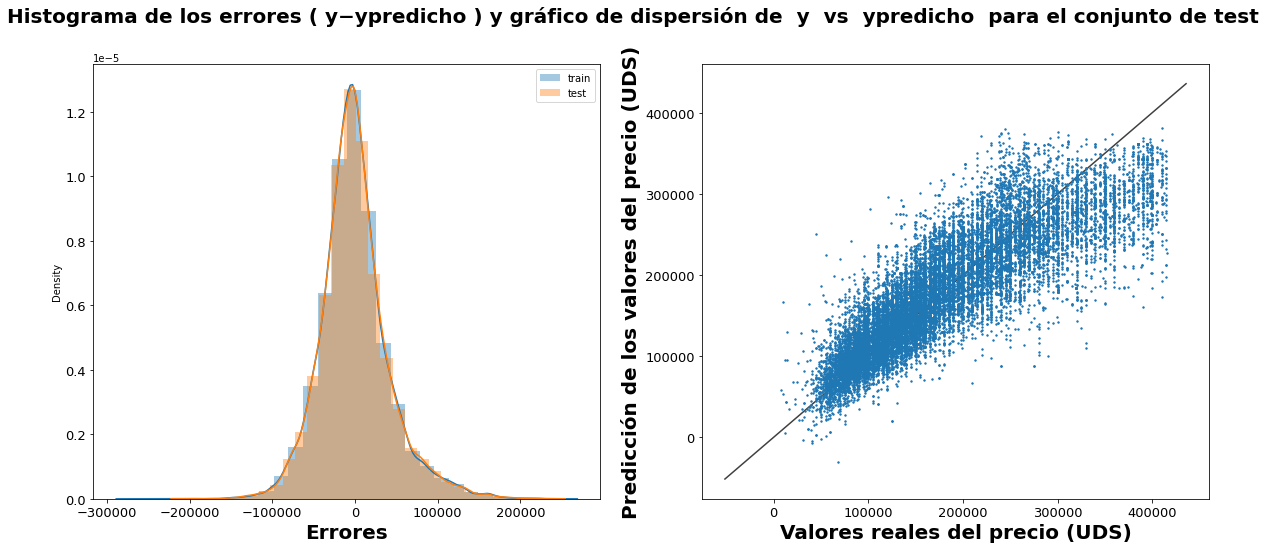

In [73]:
show_graficos(X_train_new, X_test_new, y_train, y_test,reg_ridge)

In [74]:
# regularización lasso con un alpha de 0.0001
reg_lasso = Lasso(alpha = 0.0001)

In [75]:
# Metrícas regularización lasso
show_scores(X_train_new, X_test_new, y_train, y_test,reg_lasso)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46871628167853.305, tolerance: 36084106413.65788
  positive)


{'Error Absoluto Medio train (MAE)': 30482.847983269705,
 'Error Absoluto Medio test (MAE)': 30436.69803462668,
 'Raíz del error cuadrático medio en train (RMSE)': 41632.07468907621,
 'Raíz del error cuadrático medio en test (RMSE)': 41581.928012689976,
 'Train R^2': 0.740198845853637,
 'Test R^2': 0.7428175119637314}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46871628167853.305, tolerance: 36084106413.65788
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg,

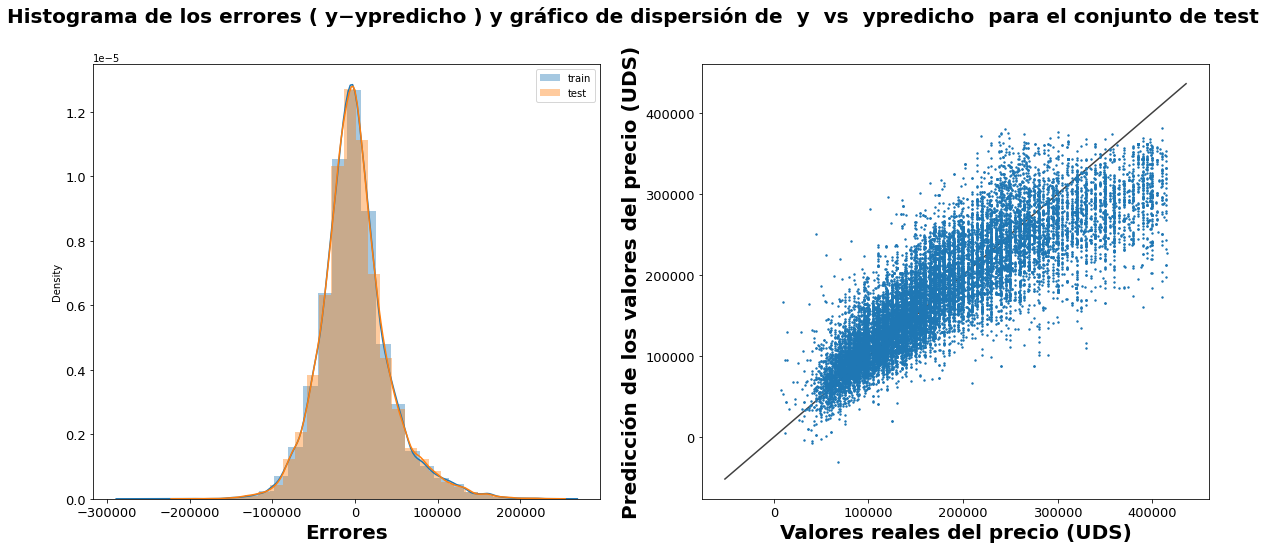

In [76]:
show_graficos(X_train_new, X_test_new, y_train, y_test,reg_lasso)

Con la regularización ridge y lasso se evita el overfitting que se produce al emplear la regresión con atributos polinómicos, sin embargo, se puede ver que la distribución de los errores de la regresión lineal con atributos polinómicos, son practicamente iguales que los que se obtuvieron con la regularización ridge y lasso, donde no se pudo bajar mucho el overfitting en el modelo.

### Validación cruzada
Se evalua el modelo de regresión lineal con atributos polinómicos y regularización con validación cruzada, donde se implementa k = 5 para las particiones de la validaión e interacciones, donde se evalua el error absoluto medio,raíz del error cuadrático medio y el r^2

In [77]:
from sklearn.model_selection import cross_validate

In [78]:
# Validación cruzada para los modelos ridge y lasso

ridge_scores = cross_validate(reg_ridge, X_escalada, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
lasso_scores= cross_validate(reg_lasso, X_escalada, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3522462363267.422, tolerance: 41757983532.34474
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3492745048027.703, tolerance: 41200372026.995544
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3605199416160.2188, tolerance: 41310041348.324646
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

In [79]:
#Metrícas de la validación cruzada
sorted(ridge_scores.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_root_mean_squared_error',
 'test_r2',
 'train_neg_mean_absolute_error',
 'train_neg_root_mean_squared_error',
 'train_r2']

In [80]:
# Crear función para evaluar la validación cruzada

def show_scores_validacion_cruzada(X,y,num_cv,modelo):
    
    validate = cross_validate(modelo, X, y, cv=num_cv, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)

    scores_valid = {"Error Absoluto Medio train (MAE)": validate['train_neg_mean_absolute_error'],
              "Error Absoluto Medio test (MAE)": validate['test_neg_mean_absolute_error'],
              "Raíz del error cuadrático medio en train (RMSE)": validate['train_neg_root_mean_squared_error'],
              "Raíz del error cuadrático medio en test (RMSE)": validate['test_neg_root_mean_squared_error'],
              "Train R^2": validate['train_r2'],
              "Test R^2":validate['test_r2'] }
    
    cv_scores = pd.DataFrame(scores_valid)
    return cv_scores

show_scores_validacion_cruzada(X_escalada,y,5,reg_ridge)

Error Absoluto Medio train (MAE)  Error Absoluto Medio test (MAE)  \
0                     -33824.429044                    -33161.877699   
1                     -33752.453134                    -33276.060999   
2                     -33655.343097                    -33692.291475   
3                     -33654.308740                    -33740.132359   
4                     -33341.830954                    -34531.755236   

   Raíz del error cuadrático medio en train (RMSE)  \
0                                    -45959.808455   
1                                    -45819.652538   
2                                    -45748.414884   
3                                    -45635.850513   
4                                    -45300.248527   

   Raíz del error cuadrático medio en test (RMSE)  Train R^2  Test R^2  
0                                   -44654.434868   0.687312  0.688292  
1                                   -45231.842127   0.685010  0.697636  
2                                   -45508.123215   0.686823  0.690673  
3                                   -45962.037240   0.688699  0.683439  
4                                   -47311.017803   0.690865  0.673561

In [81]:
show_scores_validacion_cruzada(X_escalada,y,5,reg_lasso)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3522462363267.422, tolerance: 41757983532.34474
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3492745048027.703, tolerance: 41200372026.995544
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3605199416160.2188, tolerance: 41310041348.324646
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

Error Absoluto Medio train (MAE)  Error Absoluto Medio test (MAE)  \
0                     -33824.429020                    -33161.877665   
1                     -33752.453112                    -33276.060974   
2                     -33655.343071                    -33692.291454   
3                     -33654.308710                    -33740.132340   
4                     -33341.830924                    -34531.755208   

   Raíz del error cuadrático medio en train (RMSE)  \
0                                    -45959.808455   
1                                    -45819.652538   
2                                    -45748.414884   
3                                    -45635.850513   
4                                    -45300.248527   

   Raíz del error cuadrático medio en test (RMSE)  Train R^2  Test R^2  
0                                   -44654.434868   0.687312  0.688292  
1                                   -45231.842130   0.685010  0.697636  
2                                   -45508.123224   0.686823  0.690673  
3                                   -45962.037246   0.688699  0.683439  
4                                   -47311.017795   0.690865  0.673561

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


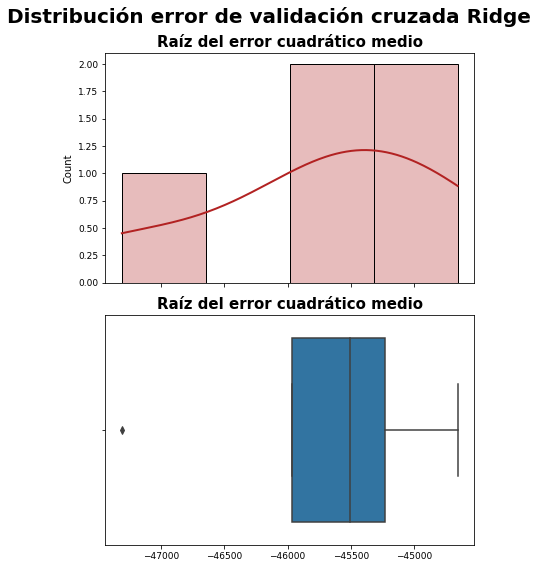

In [82]:
# Distribución del error de validación cruzada empleando raíz  del error cuadrático medio

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

sns.histplot(
    data    = ridge_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[0].tick_params(labelsize = 9)
axes[0].set_xlabel("")
    
sns.boxplot(
    ridge_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[1].tick_params(labelsize = 9)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada Ridge', fontsize = 20,
             fontweight = "bold");

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


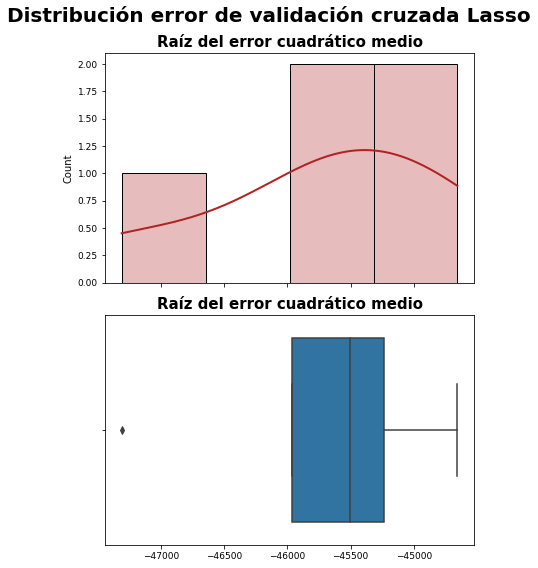

In [83]:
# Distribución del error de validación cruzada empleando raíz  del error cuadrático medio

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

sns.histplot(
    data    = lasso_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[0].tick_params(labelsize = 9)
axes[0].set_xlabel("")
    
sns.boxplot(
    lasso_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[1].tick_params(labelsize = 9)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada Lasso', fontsize = 20,
             fontweight = "bold");

Al evaluar con validación cruzada, se puede observar que los errores de los modelos ridge y lasso aumentan en compración con la evaluación sin la validación cruzada. Ademas, se puede apreciar que en la distribución de los errores de ambos modelos poseen una asimetría negativa, ya que la cola de la distribución se alarga para valores inferiores a la media, con una concentración de valores mesocúrtica. Se puede decir que los modelos estan fallando en la elección  de los parametros y que la regresión aunque se este empleando atributos polinómicos y regularización, hay que tener encuenta que solo se empleo un polinomio de grado 2, debido al costo computacional que implica elegir un grado más alto que puede mejorar las metrícas del modelo.

### Optimización de hiperparámetros

En este apartado se optimizan los hiperparámetros mediante validación cruzada, para los modelos ridge y lasso implementados anteriormente. En este proceso se hace con un RandomizedSearchCV()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Espacio de búsqueda de cada hiperparámetro para Ridge

ridge_param_distributions = {'alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada para Ridge

ridge_ramdom = RandomizedSearchCV(Ridge(),
        param_distributions = ridge_param_distributions ,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        cv         = 5, 
        verbose    = 0,
        return_train_score = True
       )

ridge_ramdom.fit(X_train_new, y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=50,
                   param_distributions={'alpha': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.74263683e-05,
       9.32603347e-05, 1.12332403e-04, 1.35304777e-04, 1.62975083e-04,
       1.96304065e-04, 2.36448...
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [85]:
# Función para ver el mejor parametro para el modelo, derivado del RandomizedSearchCV
def show_parametro(ramdom_modelo):
    print("Mejores parametros: "+str(ramdom_modelo.best_params_))
    print("Mejor Score: "+str(ramdom_modelo.best_score_))
    print("Metríca: "+str(ramdom_modelo.scoring)+'\n')

show_parametro(ridge_ramdom)

Mejores parametros: {'alpha': 73.9072203352579}
Mejor Score: -41848.016346571014
Metríca: neg_root_mean_squared_error



In [86]:
#Evaluar el RandomizedSearchCV
show_scores(X_train_new, X_test_new, y_train, y_test,ridge_ramdom)

{'Error Absoluto Medio train (MAE)': 30474.097021559846,
 'Error Absoluto Medio test (MAE)': 30429.42259031792,
 'Raíz del error cuadrático medio en train (RMSE)': 41634.08524693509,
 'Raíz del error cuadrático medio en test (RMSE)': 41583.42956541092,
 'Train R^2': -41634.08524693509,
 'Test R^2': -41583.42956541092}

A continuación se crea el modelo Ridge con el parametro alpha igual a 74 generado de la optimización implementada

In [87]:
# Modelo ridge ideal 
ideal_ridge = Ridge(alpha= 74)
ideal_ridge.fit(X_train_new, y_train)
show_scores(X_train_new, X_test_new, y_train, y_test,ideal_ridge)

{'Error Absoluto Medio train (MAE)': 30475.333815381735,
 'Error Absoluto Medio test (MAE)': 30430.383837347887,
 'Raíz del error cuadrático medio en train (RMSE)': 41633.49497357792,
 'Raíz del error cuadrático medio en test (RMSE)': 41582.973418624526,
 'Train R^2': 0.7401811192402208,
 'Test R^2': 0.7428045802170908}

In [88]:
# Espacio de búsqueda de cada hiperparámetro para Lasso

lasso_param_distributions = {'alpha': np.logspace(-5, 3, 100)}

# Búsqueda por validación cruzada para lasso

lasso_ramdom = RandomizedSearchCV(Lasso(),
        param_distributions = lasso_param_distributions ,
        n_iter     = 50,
        scoring    = 'neg_root_mean_squared_error',
        cv         = 5, 
        verbose    = 0,
        return_train_score = True
       )

lasso_ramdom.fit(X_train_new, y_train)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37668916488835.46, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37384446466010.56, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37700294864450.45, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might 

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37660769062598.234, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37375495376389.67, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37693003807886.67, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37669508465992.49, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37385096716310.01, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37700824636382.22, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might 

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37658900559159.28, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37373442131107.96, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37691331762987.66, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might 

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37276105697218.2, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36949526674905.67, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37349273272397.586, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might 

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37662319700848.45, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37377199206148.78, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37694391426097.73, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might 

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37669673380192.195, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37385277861472.82, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37700972221735.37, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17727949321247.953, tolerance: 36084106413.65788
  positive)


RandomizedSearchCV(cv=5, estimator=Lasso(), n_iter=50,
                   param_distributions={'alpha': array([1.00000000e-05, 1.20450354e-05, 1.45082878e-05, 1.74752840e-05,
       2.10490414e-05, 2.53536449e-05, 3.05385551e-05, 3.67837977e-05,
       4.43062146e-05, 5.33669923e-05, 6.42807312e-05, 7.74263683e-05,
       9.32603347e-05, 1.12332403e-04, 1.35304777e-04, 1.62975083e-04,
       1.96304065e-04, 2.36448...
       2.91505306e+01, 3.51119173e+01, 4.22924287e+01, 5.09413801e+01,
       6.13590727e+01, 7.39072203e+01, 8.90215085e+01, 1.07226722e+02,
       1.29154967e+02, 1.55567614e+02, 1.87381742e+02, 2.25701972e+02,
       2.71858824e+02, 3.27454916e+02, 3.94420606e+02, 4.75081016e+02,
       5.72236766e+02, 6.89261210e+02, 8.30217568e+02, 1.00000000e+03])},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [89]:
show_parametro(lasso_ramdom)

Mejores parametros: {'alpha': 6.5793322465756825}
Mejor Score: -41847.889708599694
Metríca: neg_root_mean_squared_error



In [90]:
#Evaluar el RandomizedSearchCV
show_scores(X_train_new, X_test_new, y_train, y_test,lasso_ramdom)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443182305701.1172, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446377101589.89844, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441150591424.15625, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You migh

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31832229160754.242, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31481651920032.508, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32238058470457.375, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You mig

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37629319731081.055, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37340915453090.94, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37664863671862.8, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might 

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16794893856521.617, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11336159491116.922, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9083237217879.61, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34791265998798.72, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34412624165179.773, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35117071669310.92, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37669710835443.38, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37385319002919.03, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37701005741290.484, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240667940543.8125, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247901267384.3828, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 241060762021.96094, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37668185636792.375, tolerance: 28910830103.8613
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37383643647878.38, tolerance: 28820369375.857628
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37699640813854.74, tolerance: 28961235560.13727
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might

{'Error Absoluto Medio train (MAE)': 30479.792281476064,
 'Error Absoluto Medio test (MAE)': 30433.87522610289,
 'Raíz del error cuadrático medio en train (RMSE)': 41634.79731636832,
 'Raíz del error cuadrático medio en test (RMSE)': 41584.45650411686,
 'Train R^2': -41634.79731636832,
 'Test R^2': -41584.45650411686}

A continuación se crea el modelo Lasso con el parametro alpha igual a 6.6 generado de la optimización implementada

In [91]:
# Modelo lasso ideal 
ideal_lasso = Lasso(alpha= 6.6)
ideal_lasso.fit(X_train_new, y_train)
show_scores(X_train_new, X_test_new, y_train, y_test,ideal_lasso)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17700990602657.195, tolerance: 36084106413.65788
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17700990602657.195, tolerance: 36084106413.65788
  positive)


{'Error Absoluto Medio train (MAE)': 30480.498010395055,
 'Error Absoluto Medio test (MAE)': 30434.501716346604,
 'Raíz del error cuadrático medio en train (RMSE)': 41634.00007746634,
 'Raíz del error cuadrático medio en test (RMSE)': 41584.26699423997,
 'Train R^2': 0.7401748148776819,
 'Test R^2': 0.7427885781435988}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


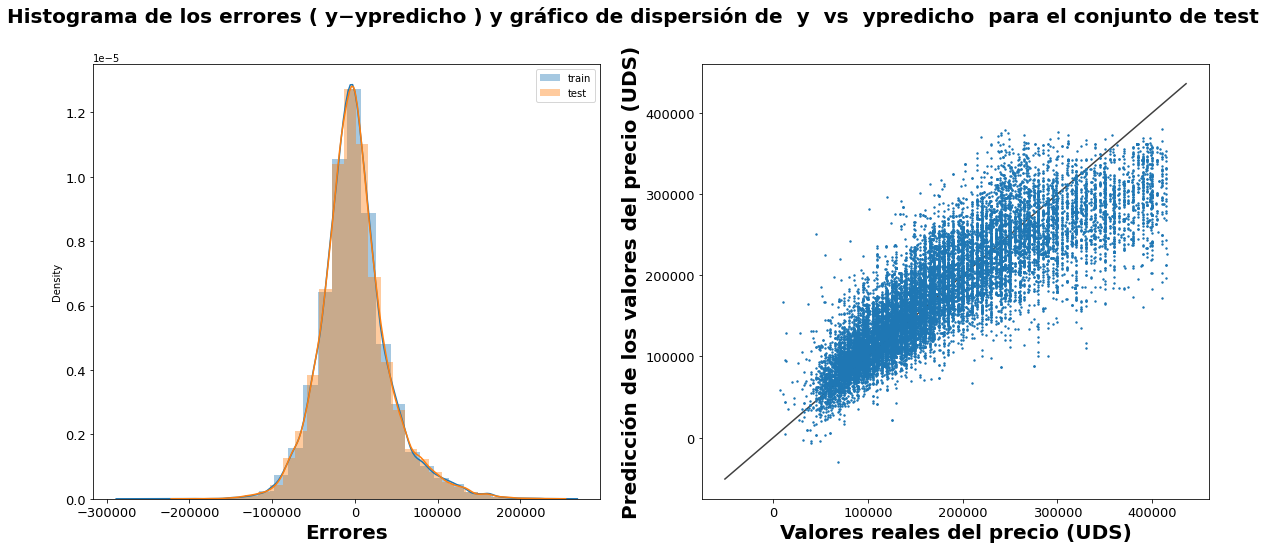

In [92]:
# Histograma de errores para  ideal Ridge 
show_graficos(X_train_new, X_test_new, y_train, y_test,ideal_ridge)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17700990602657.195, tolerance: 36084106413.65788
  positive)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg,

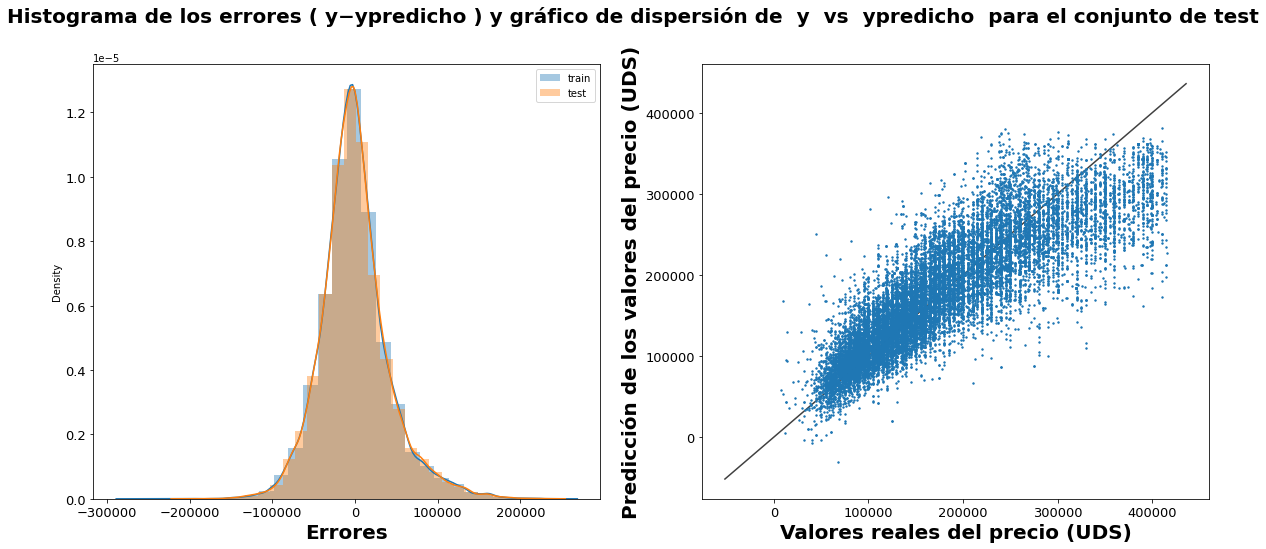

In [94]:
# Histograma de errores para  ideal lasso 
show_graficos(X_train_new, X_test_new, y_train, y_test,ideal_lasso)

* Al comparar los modelos ridge y lasso inicial con los generados de la optimización de hiperparametros, no mejoraron con respecto a los modelos iniciales, ya que estos no se redujeron en gran medida con los mejores hiperparametros para los modelos y practicamente se puede decir que se mantuvieron iguales. Donde el modelo ridge sus errores pasaron de  ~ 30430(MAE) Y ~41580 (RMSE) a tener el mismo comportamiento, para el modelo lasso ocurre  de igual forma, los errores son  mas o menos iguales a los del modelo Ridge-Lasso iniacial y su optimización. 

* Con respecto a lo sucedido, al el elegir un grado no tan alto en los polinomios de la regresión, esto influyo en que los modelos ridge y lasso no obtuvieran mejoras al momento de optimizar. 

* Una vez comparado, se eleigen los modelos ridge y lasso generados de la optimización de hiperparametros con alpha de 74 y 6.6 respectivamente, ya que estos parametros son elegidos con base a la implementación de una optimización y no seleccionados al azar como en los modelos iniciales, pese a que los errores son practicamente iguales.

## Random Forest 

En el presente apartado de implementa un random Forest,dicho modelo está formado por un conjunto (ensamble)  de árboles de decisión individuales, cada uno entrenado con una muestra ligeramente distinta de los datos de entrenamiento generada mediante bootstrapping, donde cada árbol se entrena con unos datos ligeramente distintos.

In [95]:
# Importar herramientas
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10, criterion="mse",oob_score = True, max_depth=12, max_features=5)

In [96]:
#Evaluación del modelo

show_scores(X_train, X_test, y_train, y_test,rf_model)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


{'Error Absoluto Medio train (MAE)': 24590.961626534205,
 'Error Absoluto Medio test (MAE)': 26138.424236937557,
 'Raíz del error cuadrático medio en train (RMSE)': 34200.45218047428,
 'Raíz del error cuadrático medio en test (RMSE)': 36479.92666880171,
 'Train R^2': 0.8246730554960402,
 'Test R^2': 0.8020570390981593}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarnin

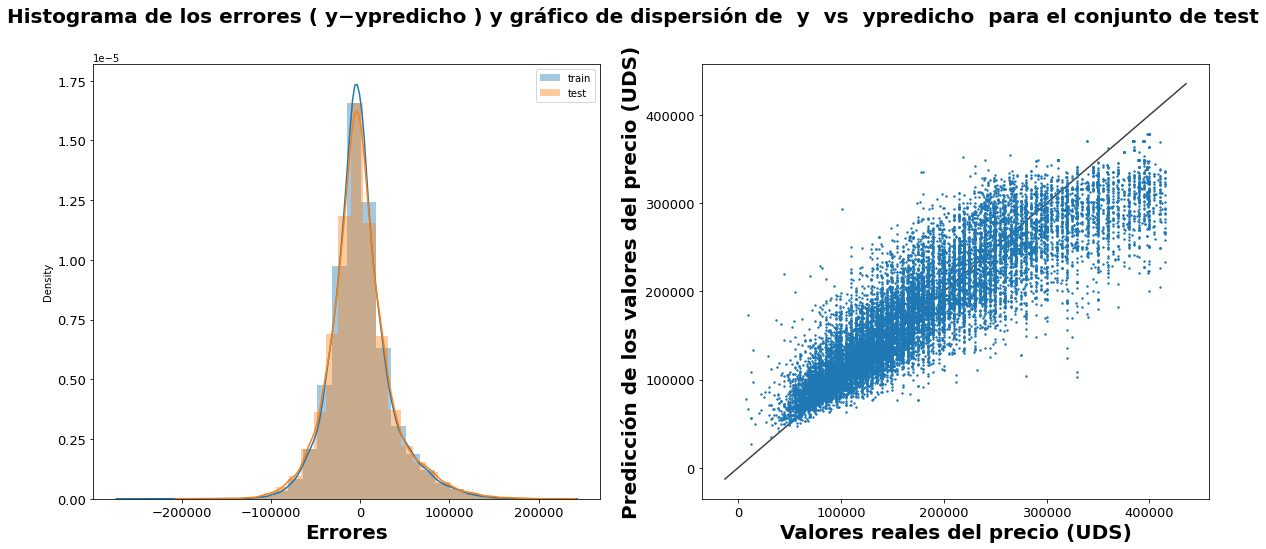

In [97]:
show_graficos(X_train, X_test, y_train, y_test,rf_model) 

* Al comparar el modelo Random Forest con los modelos ridge y lasso con regularización, se puede ver que en comparación a estos ultímos, los errores se reducen mucho mas, pasando de rmse de aproximadamente ~ 41580 a ~ 36479 y para el mae de ~30430 a ~26138. Ademas el grafico de disérsión se ajusta mejor a la linea recta y la distribución de los errores presenta una buena asimetría.

* A continuación se procede a evaluar con validación cruzada y posteriormente se procede a encontar los mejores hiperparametros para el Random Forest

### Validación cruzada para Random Forest 
Se evalua el Random Forest con  validación cruzada 

In [98]:
# Validación cruzada para random forest

rf_scores = cross_validate(rf_model, X_escalada, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
show_scores_validacion_cruzada(X_escalada,y,5,rf_model)

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any re

Error Absoluto Medio train (MAE)  Error Absoluto Medio test (MAE)  \
0                     -24370.598513                    -25212.094532   
1                     -24397.476155                    -25579.592234   
2                     -24176.790874                    -26338.345714   
3                     -24021.226680                    -25745.293730   
4                     -24195.845081                    -27155.915682   

   Raíz del error cuadrático medio en train (RMSE)  \
0                                    -33784.102883   
1                                    -33815.275473   
2                                    -33788.390386   
3                                    -33387.837095   
4                                    -33605.263978   

   Raíz del error cuadrático medio en test (RMSE)  Train R^2  Test R^2  
0                                   -35137.451863   0.831042  0.806999  
1                                   -35738.014526   0.828439  0.811243  
2                                   -36643.406697   0.829166  0.799446  
3                                   -36409.168457   0.833373  0.801354  
4                                   -37563.868774   0.829878  0.794213

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


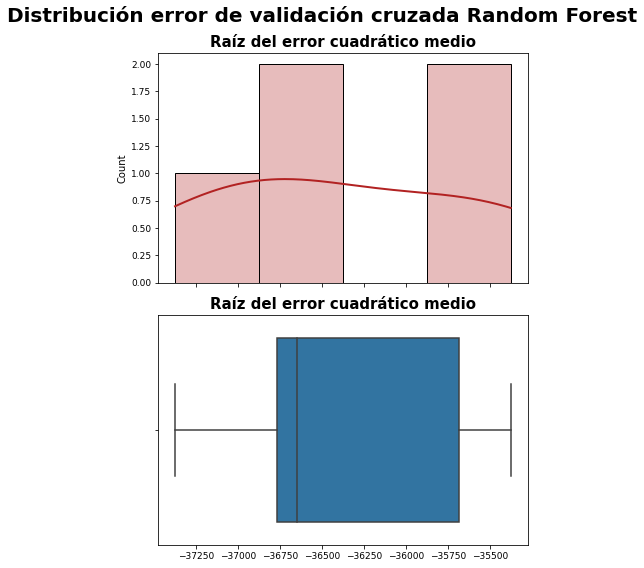

In [99]:
# Distribución del error de validación cruzada empleando raíz  del error cuadrático medio

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

sns.histplot(
    data    = rf_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[0].tick_params(labelsize = 9)
axes[0].set_xlabel("")
    
sns.boxplot(
    rf_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[1].tick_params(labelsize = 9)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada Random Forest', fontsize = 20,
             fontweight = "bold");

Al evaluar con validación cruzada se puede apreciar que en la distribución de los errores posee una asimetría  psositiva,donde la cola de la distribución se alarga para valores superiores a la media, la cual tiene una concentración de valores plasticúrtica, lo que quiere decir que tiene una baja concentración.

### Optimización de hiperparámetros para Random Forest

En este apartado se optimizan los hiperparámetros mediante validación cruzada, para el random forest implementado anteriormente.En este proceso se hace con un RandomizedSearchCV()

In [100]:
#Espacio de búsqueda de cada hiperparámetro para random forest
rf_grid = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 3, 5, 10,15,20,30],
           #"min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1,5,10,15,20,"sqrt", "auto"]}
           #"max_samples": [10000],
           #"oob_score":   [True, False]}

# Búsqueda por validación cruzada para random forest
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              scoring    = 'neg_root_mean_squared_error',
                              n_iter=50,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 27.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10, 15, 20,
                                                      30],
                                        'max_features': [0.5, 1, 5, 10, 15, 20,
                                                         'sqrt', 'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   scoring='neg_root_mean_squared_error', verbose=True)

In [101]:
#Mejores hiperparametros
show_parametro(rs_model)

Mejores parametros: {'n_estimators': 180, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 30}
Mejor Score: -27733.34627503147
Metríca: neg_root_mean_squared_error



In [102]:
# Evaluación de la optimización
show_scores(X_train, X_test, y_train, y_test,rs_model) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 48.5min finished


{'Error Absoluto Medio train (MAE)': 6711.036274785756,
 'Error Absoluto Medio test (MAE)': 15505.396439409596,
 'Raíz del error cuadrático medio en train (RMSE)': 11326.807847973949,
 'Raíz del error cuadrático medio en test (RMSE)': 26719.94059058247,
 'Train R^2': -11326.807847973949,
 'Test R^2': -26719.94059058247}

In [103]:
# Modelo ideal 
rf_ideal_model = RandomForestRegressor(n_estimators=180,
                                    min_samples_leaf=1,
                                    max_features=10,
                                    max_depth = 30,
                                    n_jobs=-1)
rf_ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=10, n_estimators=180,
                      n_jobs=-1)

In [104]:
#Evaluación del modelo ideal 
show_scores(X_train, X_test, y_train, y_test,rf_ideal_model)

{'Error Absoluto Medio train (MAE)': 6706.629528401951,
 'Error Absoluto Medio test (MAE)': 15485.479441000616,
 'Raíz del error cuadrático medio en train (RMSE)': 11287.791246340947,
 'Raíz del error cuadrático medio en test (RMSE)': 26689.154591605966,
 'Train R^2': 0.980901339611194,
 'Test R^2': 0.8940497993518134}

* Con los nuevos hiperparámetros, se puede observar una mejora en el rendimiento del modelo.Donde, los errores tanto el rmse como el mae se reducen en comparación del modelo inicial y también en compración a los modelos anteriormente implementados. Por tato se elige el random forest optimizado, ya que este modelo predice mejor que el random forest inicial, porque pasa de un rmse de ~ 36480 y mae de ~ 26138  a ~ 26689 y ~ 15485 respectivamente.

* *Se puede hacer un modelo más rápido alterando algunos de los hiperparámetros. En particular, reduciendo n_estimadores, ya que cada aumento de n_estimadores es básicamente la construcción de otro pequeño modelo.
Sin embargo, la reducción de n_estimators o la alteración de otros hiperparámetros puede conducir a resultados más pobres en el modelo.*

In [105]:
# Modelo rapido
fast_model = RandomForestRegressor(n_estimators=15,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
show_scores(X_train, X_test, y_train, y_test,fast_model)

{'Error Absoluto Medio train (MAE)': 12518.26388027717,
 'Error Absoluto Medio test (MAE)': 18075.024343385787,
 'Raíz del error cuadrático medio en train (RMSE)': 20106.293524281566,
 'Raíz del error cuadrático medio en test (RMSE)': 29114.30129512856,
 'Train R^2': 0.9394032956832556,
 'Test R^2': 0.8739203794294395}

In [106]:
# Modelo rapido
fast_model2 = RandomForestRegressor(n_estimators=5,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
show_scores(X_train, X_test, y_train, y_test,fast_model2)

{'Error Absoluto Medio train (MAE)': 13318.96132909177,
 'Error Absoluto Medio test (MAE)': 18944.129609136,
 'Raíz del error cuadrático medio en train (RMSE)': 21453.656537324357,
 'Raíz del error cuadrático medio en test (RMSE)': 30519.846759658405,
 'Train R^2': 0.9310097664708316,
 'Test R^2': 0.8614530892955368}

**Como era de esperarse al emplear modelos más rapidos, con menos costo computacional, variando las caracteriticas y atributos del modelo optimizado como el n_estimators, el max_depth  y max_features, los modelos rapidos se deterioran en sus metricas, donde al elegir menos arboles cada vez los errores aumentan, empeorando el modelo y el coeficiente de determinación disminuye**

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


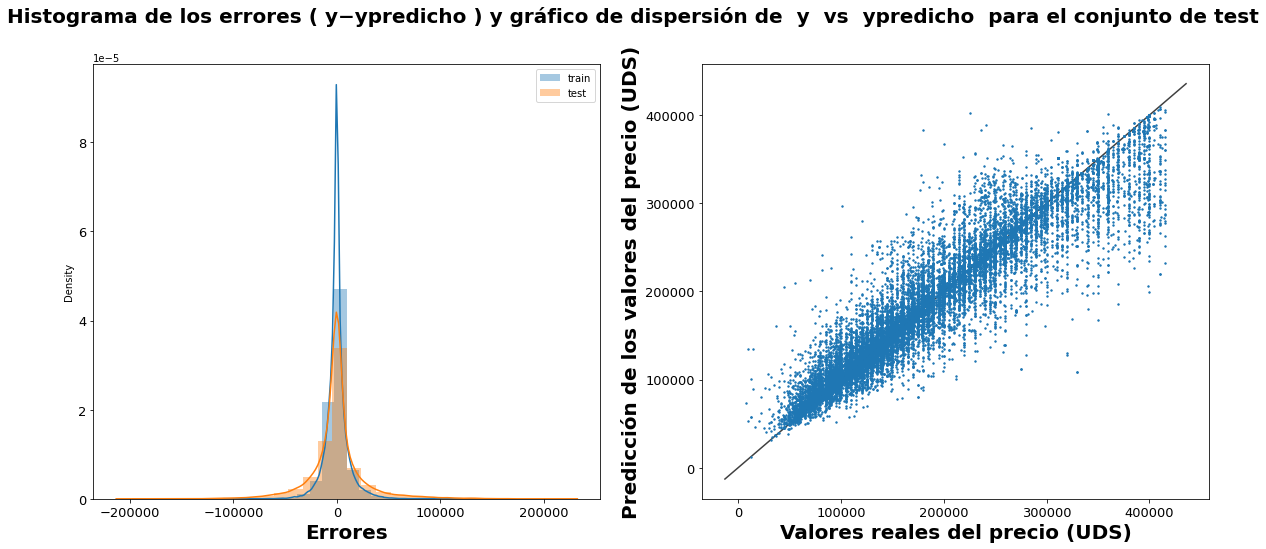

In [107]:
show_graficos(X_train, X_test, y_train, y_test,rf_ideal_model) 

El grafico de dispersión para el random forest ideal se ajusta muy bien a la linea recta y el grafico de la distribución de los errores se acerca mucho mas al cero.

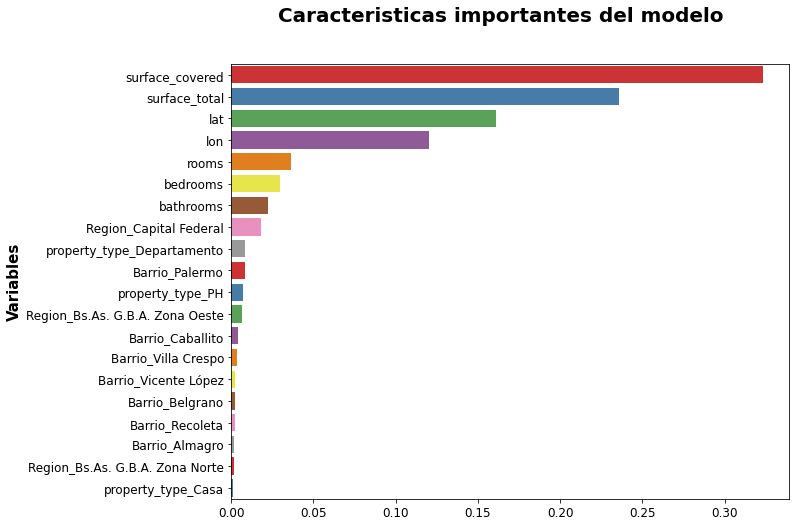

In [108]:
# Caracteristicas importantes del modelo

plot_features(X.columns, rf_ideal_model.feature_importances_)

Las caracteristicas mas relevantes para la predicción del modelo, son la superficie cuebierta y la total, seguidas de la localizción de las propiedades la cual esta dada por la latitud y la longitud. 

## XGBOOST

En el presente apartado de implementa un XGBOOST, esto con el fin de implementar un moldelo que permita mejorar las metricas.

In [109]:
#Modelo  XGBOOST
from xgboost import XGBRegressor
xgmodel = XGBRegressor(n_estimators=50)

In [110]:
#Evaluación del modelo
show_scores(X_train, X_test, y_train, y_test,xgmodel)

{'Error Absoluto Medio train (MAE)': 22786.354930412635,
 'Error Absoluto Medio test (MAE)': 24264.401865296146,
 'Raíz del error cuadrático medio en train (RMSE)': 31638.637457475794,
 'Raíz del error cuadrático medio en test (RMSE)': 34013.95456073514,
 'Train R^2': 0.8499553509633162,
 'Test R^2': 0.8279136578294317}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


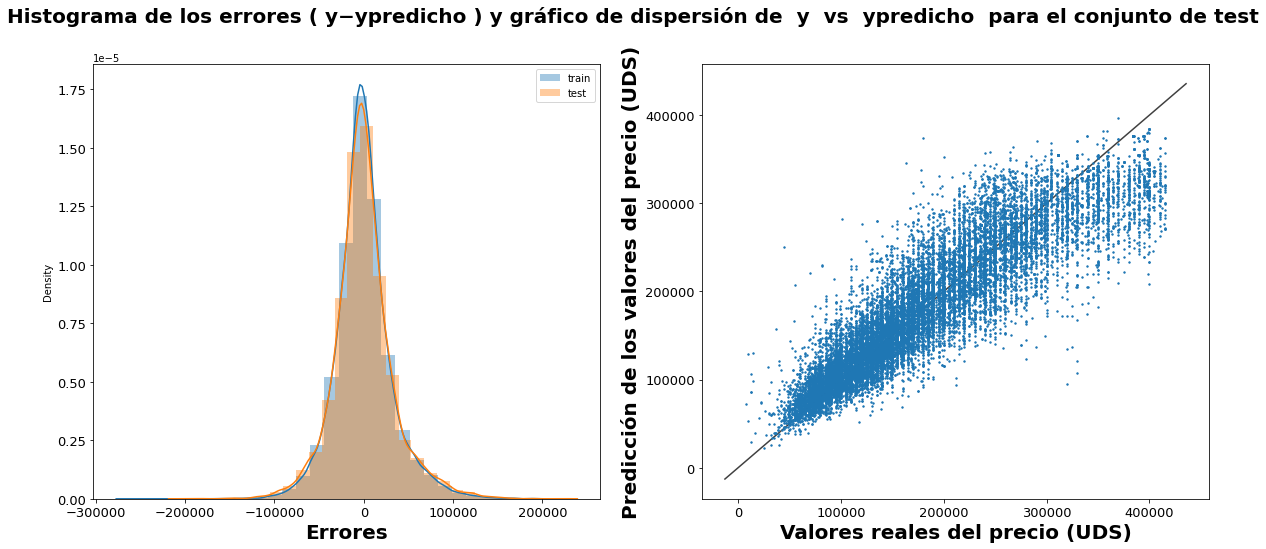

In [111]:
show_graficos(X_train, X_test, y_train, y_test,xgmodel)

Se puede ver que con el n_estimators = 50, para el XGBOOST, el modelo no se comporta muy  bien, ya que aumentan los errores en comparación con el random forest.

### Validación cruzada para XGBOOST
Se evalua el XGBOOST con validación cruzada 

In [112]:
# Validación cruzada

xg_scores = cross_validate(xgmodel,X_escalada, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'),return_train_score=True)
show_scores_validacion_cruzada(X_escalada,y,5,xgmodel)

Error Absoluto Medio train (MAE)  Error Absoluto Medio test (MAE)  \
0                     -22859.565041                    -23573.873640   
1                     -22777.064484                    -23753.339615   
2                     -22770.472161                    -24720.638457   
3                     -22870.767500                    -24368.048856   
4                     -22550.969822                    -25204.674456   

   Raíz del error cuadrático medio en train (RMSE)  \
0                                    -31825.786285   
1                                    -31706.789778   
2                                    -31652.180763   
3                                    -31763.682446   
4                                    -31466.215716   

   Raíz del error cuadrático medio en test (RMSE)  Train R^2  Test R^2  
0                                   -33019.172242   0.850062  0.829568  
1                                   -33547.984735   0.849167  0.833669  
2                                   -34640.743539   0.850085  0.820768  
3                                   -34604.456452   0.849190  0.820559  
4                                   -34997.207183   0.850846  0.821374

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


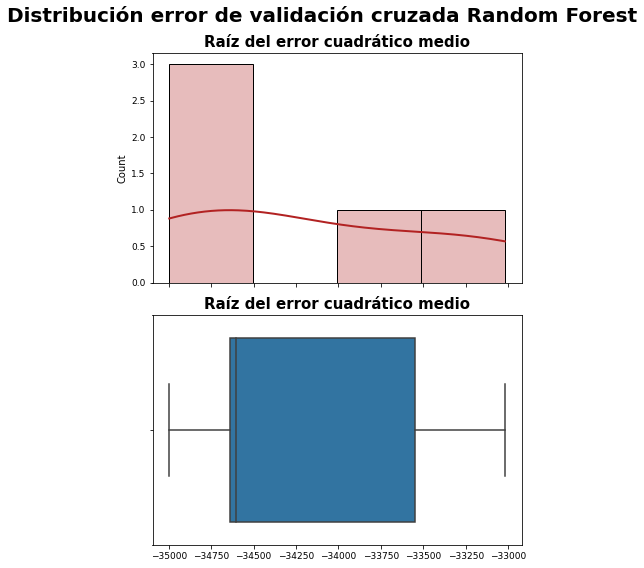

In [113]:
# Distribución del error de validación cruzada empleando raíz  del error cuadrático medio

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 8), sharex=True)

sns.histplot(
    data    = xg_scores['test_neg_root_mean_squared_error'],
    stat    = "count",
    kde     = True,
    line_kws= {'linewidth': 2},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[0]
)

axes[0].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[0].tick_params(labelsize = 9)
axes[0].set_xlabel("")
    
sns.boxplot(
    xg_scores['test_neg_root_mean_squared_error'],
    ax      = axes[1]
)
axes[1].set_title('Raíz del error cuadrático medio', fontsize = 15, fontweight = "bold")
axes[1].tick_params(labelsize = 9)
axes[1].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución error de validación cruzada Random Forest', fontsize = 20,
             fontweight = "bold");

El grafico de distribución de errores cuanta con una consentración plasticúrtica de los datos y con una asimetría positiva,donde la cola de la distribución se alarga para valores superiores a la media.

### Optimización de hiperparámetros para XGBOOST

En este apartado se optimizan los hiperparámetros mediante validación cruzada, para el XGBOOST implementado anteriormente.En este proceso se hace con un RandomizedSearchCV()

In [114]:
#Espacio de búsqueda de cada hiperparámetro para XGBOOST
xg_grid = {"n_estimators": np.arange(10, 120, 10),
           "max_depth": [None, 3, 5, 10,15,20,30]}

# Búsqueda por validación cruzada para XGBRegressor
xg = RandomizedSearchCV(XGBRegressor(),
                              param_distributions=xg_grid,
                              scoring    = 'neg_root_mean_squared_error',
                              n_iter=50,
                              cv=5,
                              verbose=True)

xg.fit(X_train, y_train) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 55.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                         

In [115]:
#Mejores hiperparametros
show_parametro(xg)

Mejores parametros: {'n_estimators': 110, 'max_depth': 15}
Mejor Score: -28621.97907476013
Metríca: neg_root_mean_squared_error



In [116]:
# Evaluación de la optimización
show_scores(X_train, X_test, y_train, y_test,xg) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 29.5min finished


{'Error Absoluto Medio train (MAE)': 4454.34568681272,
 'Error Absoluto Medio test (MAE)': 15334.912986891968,
 'Raíz del error cuadrático medio en train (RMSE)': 8043.161309187941,
 'Raíz del error cuadrático medio en test (RMSE)': 27515.33621226684,
 'Train R^2': -8043.161309187941,
 'Test R^2': -27515.33621226684}

In [117]:
# Modelo ideal
xg_ideal_model = XGBRegressor(n_estimators=110, max_depth=15)
xg_ideal_model.fit(X_train, y_train)
show_scores(X_train, X_test, y_train, y_test,xg_ideal_model) 

{'Error Absoluto Medio train (MAE)': 3926.750772709332,
 'Error Absoluto Medio test (MAE)': 15144.266482501138,
 'Raíz del error cuadrático medio en train (RMSE)': 7496.578606812672,
 'Raíz del error cuadrático medio en test (RMSE)': 27478.112166727613,
 'Train R^2': 0.9915761394959218,
 'Test R^2': 0.8876932309993274}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


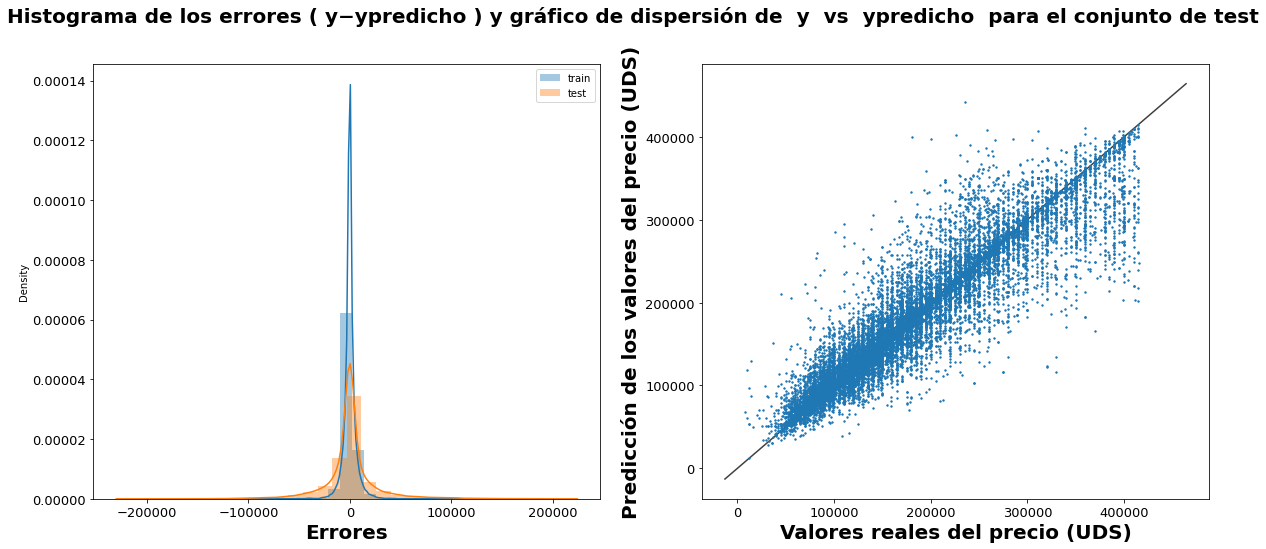

In [118]:
show_graficos(X_train, X_test, y_train, y_test,xg_ideal_model) 

Con respecto al modelo XGBOOST inicial, comparado con el optimizado, se dio una gran mejoria en cuanto a los errores, pasando de un rmse de aproximadamente 34013 y un mae de 24264 a 27478 de rmse y mae de 15144 con el modelo de hiperparametros optimizados, por tanto es mejor elegir este ultimo. Ademas, el grafico de dispersión se ajusta mejor a la linea recta y la de distribución de los errores está mucho mas cercana al cero.

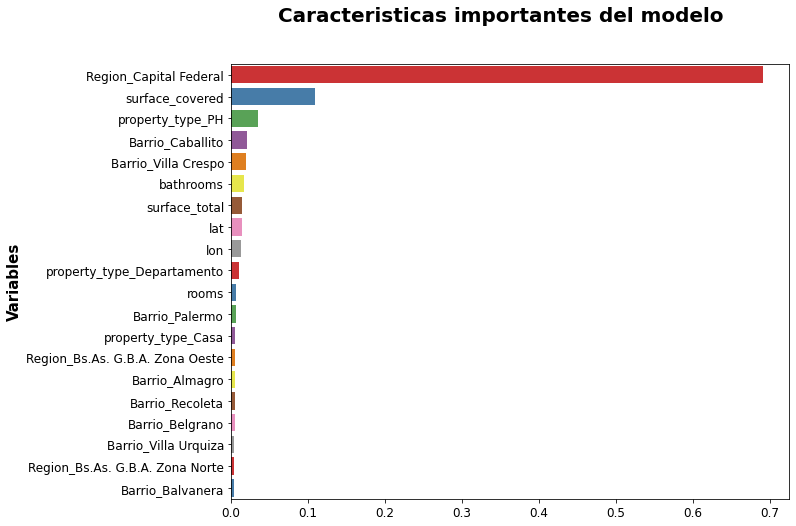

In [119]:
# Caracteristicas importantes del modelo
plot_features(X.columns, xg_ideal_model.feature_importances_)

La caracteristicas mas relevantes para el modelo XGBOOST, son la región capital federal,superficie cubierta y el tipo de propiedad PH, donde se puede ver que los atributos de las pripiedades como habitaciones y baños, no tienen tanta relavancia como la ubicación de las propiedades para este modelo.

# Conclusiones

* Se puede concluir que el mejor modelo obtenido es el Random Forest con n_estimators=180, min_samples_leaf=1, max_features=10, max_depth = 30, n_jobs=-1. El preprocesamiento de los datos, es un item que influye mucho para mejorar las metricas de los modelos, al igual que emplear modelos mas avanzados y rosbustos para mejorar el rendimeinto de de los modelos.

* La optimización de hiperametro contrubuyo a la busqueda de parametros que ayudan a que los modelos predigan mejor, permitiendo la reducción de los errores, ya que para el Random Forest rmse con la optimización se redujo en un 28% y  se aumentando el coefiente de determinación.

* Los errores tanto el MAE como el RMSE presentaron disminución con en comparación a los modelos iniciales, a exepción de los modelos de regresión ridge y lasso, los cuales no disminuyeron en comparación de los otros modelos, estos valores continuan siendo altos y se requiere explorar otras opciones, como aumentar el grado en los atributos polinómicos, si se cuent con un bajo costo computacional.


* Por tanto el modelo a emplear seria el  Random Forest con n_estimators=180, debido a que es el modelo que presenta un menor RMSE con respecto a los demas, de igual forma el coeficiente de determinación llego a un 89%.

In [120]:
resumen_proyect = {"Modelo":["XGBOOST", "Random Forest", "Ridge", "Lasso"], 
           "Hiper-parámetros":["n_estimators = 110", "n_estimators = 180", "alpha= = 74", "alpha = 6.6"], 
           "Variables Predictoras": [23, 23, 23, 23],
           "MA (test)": ["~15144 ", "~15485", "~30430", "~30434"],
           "RMSE (test)":["~27478", "~26689 ", "~41582", "~41584"], 
           "$R^{2}$ (test)":["88%", "89%", "74%", "74%"]}
pd.DataFrame(resumen_proyect)

Modelo    Hiper-parámetros  Variables Predictoras MA (test)  \
0        XGBOOST  n_estimators = 110                     23   ~15144    
1  Random Forest  n_estimators = 180                     23    ~15485   
2          Ridge         alpha= = 74                     23    ~30430   
3          Lasso         alpha = 6.6                     23    ~30434   

  RMSE (test) $R^{2}$ (test)  
0      ~27478            88%  
1     ~26689             89%  
2      ~41582            74%  
3      ~41584            74%

# Adicionales

1) Se inplementa una transformación de datos diferente a la empleada al inicio del proyecto. 

2) Se aplica una técnica de clustering sobre los datos, con el fin de identificar que barrios se parecen mas entre si

## Nueva transformación

La clase **VarianceThreshold** del módulo sklearn.feature_selection, con la finalidad de excluir aquellos predictores o caracteristicas cuya varianza es muy baja, es decir, características con información poco útil.Este proceso se realiza antes del escalado de los los datos, debido que después, todos los predictores tienen varianza 1.

In [121]:
df_properati.head()

bedrooms  surface_total        lat        lon  rooms  bathrooms  \
0       1.0           70.0 -34.624056 -58.412110    2.0        2.0   
1       1.0           45.0 -34.593569 -58.427474    2.0        1.0   
2       1.0           85.0 -34.581294 -58.436754    2.0        1.0   
3       1.0           56.0 -34.593779 -58.441239    2.0        1.0   
4       1.0           70.0 -34.600988 -58.433061    2.0        1.0   

   surface_covered     price  property_type_Casa  property_type_Departamento  \
0             58.0  159000.0                   0                           0   
1             45.0  125000.0                   0                           0   
2             50.0  295000.0                   0                           0   
3             56.0  150000.0                   0                           0   
4             70.0  159500.0                   0                           0   

   ...  Barrio_Almagro  Barrio_Balvanera  Barrio_Barrio Norte  \
0  ...               0                 0                    0   
1  ...               0                 0                    0   
2  ...               0                 0                    0   
3  ...               0                 0                    0   
4  ...               0                 0                    0   

   Barrio_Belgrano  Barrio_Caballito  Barrio_Palermo  Barrio_Recoleta  \
0                0                 0               0                0   
1                0                 0               1                0   
2                0                 0               1                0   
3                0                 0               0                0   
4                0                 0               0                0   

   Barrio_Vicente López  Barrio_Villa Crespo  Barrio_Villa Urquiza  
0                     0                    0                     0  
1                     0                    0                     0  
2                     0                    0                     0  
3                     0                    1                     0  
4                     0                    1                     0  

[5 rows x 24 columns]

In [122]:
# Separar variables predictoras de la variable objetivo(precio)
X2 = df_properati.drop(columns=["price"])
y2 = df_properati.price

In [123]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=.03)

In [124]:
# Alternativa para no perder las caracteristicas de las columnas
_ = vt.fit(X2)

# Obtener boolean mask
mask = vt.get_support()

X2_reduced = X2.loc[:, mask]
X2_reduced.shape


(77269, 17)

In [125]:
X2_reduced.columns

Index(['bedrooms', 'surface_total', 'rooms', 'bathrooms', 'surface_covered',
       'property_type_Departamento', 'property_type_PH',
       'Region_Bs.As. G.B.A. Zona Norte', 'Region_Bs.As. G.B.A. Zona Oeste',
       'Region_Capital Federal', 'Barrio_Almagro', 'Barrio_Belgrano',
       'Barrio_Caballito', 'Barrio_Palermo', 'Barrio_Recoleta',
       'Barrio_Villa Crespo', 'Barrio_Villa Urquiza'],
      dtype='object')

In [126]:
# Escalado de los datos 
X2_escalada = escalador.fit(X2_reduced)# escalar todas las variables predictoras
X2_escalada = escalador.transform(X2_reduced)
X2_escalada

array([[-0.99225629, -0.11201085, -0.76545552, ..., -0.22540435,
        -0.28122153, -0.1931863 ],
       [-0.99225629, -0.8411946 , -0.76545552, ..., -0.22540435,
        -0.28122153, -0.1931863 ],
       [-0.99225629,  0.32549939, -0.76545552, ..., -0.22540435,
        -0.28122153, -0.1931863 ],
       ...,
       [-0.99225629, -1.04536605, -0.76545552, ..., -0.22540435,
        -0.28122153, -0.1931863 ],
       [-0.99225629, -0.8411946 , -0.76545552, ..., -0.22540435,
        -0.28122153, -0.1931863 ],
       [ 0.31756948,  2.54221798,  0.25845139, ..., -0.22540435,
        -0.28122153, -0.1931863 ]])

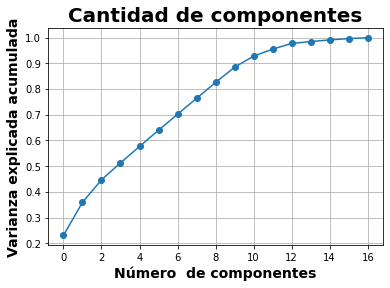

In [127]:
#Seleccionar la cantidad de componentes
from sklearn.decomposition import PCA
pca = PCA().fit(X2_escalada)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'o-')
plt.xlabel('Número  de componentes',fontsize=14,fontweight = 'black')
plt.ylabel('Varianza explicada acumulada',fontsize=14,fontweight = 'black')
plt.grid(True)
plt.title('Cantidad de componentes' , fontweight = 'black', fontsize=20);

Se seleccionan 12 componentes

In [128]:
#Se aplica PCA para reducción de variables
pca = PCA(n_components=12)
X2_escalada = pca.fit_transform(X2_escalada)
print("Componentes principales")
print(pca.components_)
print("Varianza acumulada")
varianza = pca.explained_variance_ratio_
var_acum= np.cumsum(varianza)
print(var_acum)

Componentes principales
[[ 4.35630159e-01  4.49165924e-01  4.47082832e-01  2.59278164e-01
   4.53814899e-01 -2.67909614e-01  2.19622625e-01  6.77923073e-02
   3.25931632e-02 -7.67034526e-02  4.83080662e-03 -3.87770700e-03
  -2.98539069e-03 -3.04075289e-02  1.91830540e-02 -4.40776809e-02
  -2.42120765e-02]
 [-1.50938019e-01 -5.71890119e-02 -1.35972746e-01 -1.60630885e-01
  -1.24563799e-01 -3.56457725e-01  3.18127038e-01  3.48862038e-01
   4.25753573e-01 -5.69955573e-01 -1.10028830e-01 -1.08039594e-01
  -7.72811605e-02 -1.09564531e-01 -1.16708855e-01 -4.77329747e-02
  -1.99490026e-02]
 [-1.10644596e-01 -5.32603321e-02 -8.51451294e-02 -1.31647953e-01
  -9.96044626e-02 -4.96263546e-01  5.79674873e-01 -2.70205005e-01
  -2.69983848e-01  3.88434898e-01 -3.02942111e-03 -9.97769116e-02
   5.22173019e-02  7.38829027e-02 -1.26355216e-01  1.39341385e-01
   1.33429473e-01]
 [-2.36262586e-02  2.90365296e-02 -1.99787218e-02  1.62192037e-02
   3.42426575e-02  5.45297983e-03 -7.78973801e-03  3.23962007

In [129]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_escalada, y2,test_size=0.30)
print(X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(54088, 12) (54088,) (23181, 12) (23181,)


In [130]:
# Modelo ideal
xg_nuevo = XGBRegressor(n_estimators=110, max_depth=15)
xg_nuevo.fit(X2_train, y2_train)
show_scores(X2_train, X2_test, y2_train, y2_test,xg_nuevo) 

{'Error Absoluto Medio train (MAE)': 15460.418049989474,
 'Error Absoluto Medio test (MAE)': 23777.430401072263,
 'Raíz del error cuadrático medio en train (RMSE)': 24346.171254527104,
 'Raíz del error cuadrático medio en test (RMSE)': 37162.25716047172,
 'Train R^2': 0.9110288475864858,
 'Test R^2': 0.795232915593243}

In [131]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
#Espacio de búsqueda de cada hiperparámetro para XGBOOST
xg_grid2 = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 3, 5, 10,15,20,30,50]}

# Búsqueda por validación cruzada para XGBRegressor
xg2 = RandomizedSearchCV(XGBRegressor(),
                              param_distributions=xg_grid2,
                              scoring    = 'neg_root_mean_squared_error',
                              n_iter=50,
                              cv=5,
                              verbose=True)

xg2.fit(X2_train, y2_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 58.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [132]:
#Mejores hiperparametros
show_parametro(xg2)

Mejores parametros: {'n_estimators': 80, 'max_depth': 15}
Mejor Score: -38584.80739685943
Metríca: neg_root_mean_squared_error



In [133]:
# Evaluación de la optimización
show_scores(X2_train, X2_test, y2_train, y2_test,xg2) 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 75.0min finished


{'Error Absoluto Medio train (MAE)': 17562.468471337044,
 'Error Absoluto Medio test (MAE)': 24583.182715173978,
 'Raíz del error cuadrático medio en train (RMSE)': 26397.085697709565,
 'Raíz del error cuadrático medio en test (RMSE)': 37377.917866849966,
 'Train R^2': -26397.085697709565,
 'Test R^2': -37377.917866849966}

In [134]:
# Modelo ideal
xg2_ideal_model = XGBRegressor(n_estimators=80, max_depth=15)
xg2_ideal_model.fit(X2_train, y2_train)
show_scores(X2_train, X2_test, y2_train, y2_test,xg2_ideal_model) 

{'Error Absoluto Medio train (MAE)': 16200.778092081258,
 'Error Absoluto Medio test (MAE)': 24025.002328434875,
 'Raíz del error cuadrático medio en train (RMSE)': 25036.91516245837,
 'Raíz del error cuadrático medio en test (RMSE)': 37177.79289660954,
 'Train R^2': 0.9059086919347552,
 'Test R^2': 0.7950616734464852}

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


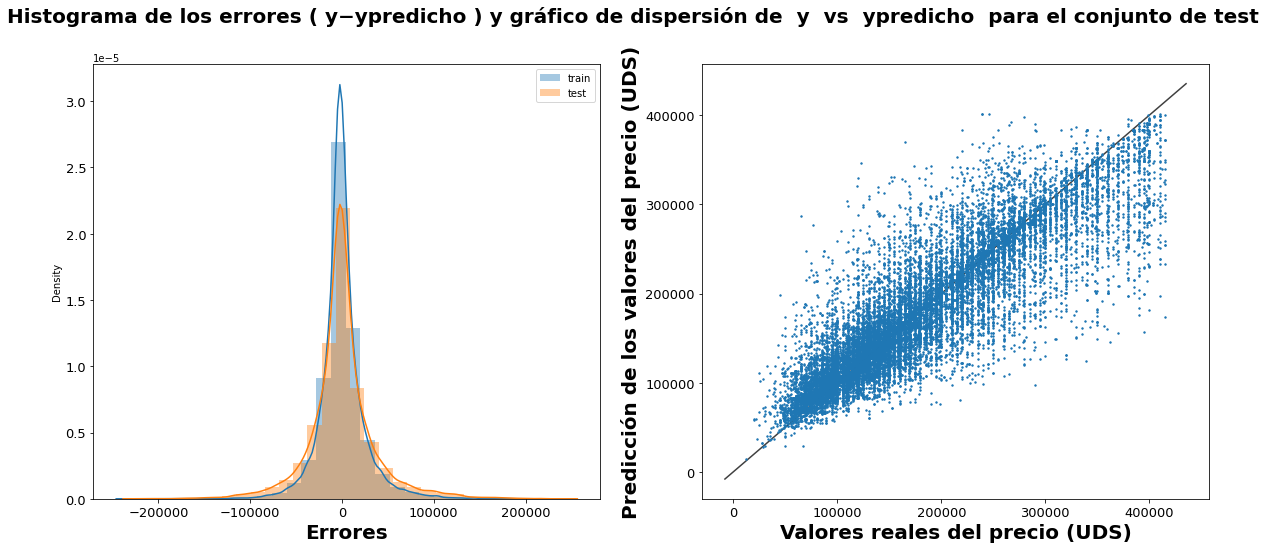

In [135]:
show_graficos(X2_train, X2_test, y2_train, y2_test,xg2_ideal_model)

Al aplicar **VarianceThreshold** del módulo sklearn.feature_selection, con la finalidad de excluir aquellos predictores o caracteristicas cuya varianza es muy baja, es decir, características con información poco util, se puede notar que en comparación con el  XGBOOST anterior o el Random Forest, el modelo empeoro, esto debido a que se eliminaron las variables que no aportaban valor y se empleo reducción de dimensionalidad influyeno en el rendimiento del modelo, ya que se paso de 23 variables predictoras solo a 12, que aunque contienen información util, no permitieron una mejora en las metricas.

## Clustering

In [136]:
#Clustering

from sklearn.cluster import KMeans 
c_model = KMeans(n_clusters=5, max_iter=100)
c_model.fit(df_properati)

#Centroides de los clusters
centroides=pd.DataFrame(c_model.cluster_centers_, columns=df_properati.columns.values)
centroides.round(0)

bedrooms  surface_total   lat   lon  rooms  bathrooms  surface_covered  \
0       2.0          101.0 -35.0 -58.0    3.0        2.0             86.0   
1       1.0           48.0 -35.0 -58.0    2.0        1.0             43.0   
2       2.0          115.0 -35.0 -58.0    4.0        2.0             99.0   
3       2.0           62.0 -35.0 -58.0    2.0        1.0             54.0   
4       2.0           81.0 -35.0 -58.0    3.0        1.0             70.0   

      price  property_type_Casa  property_type_Departamento  ...  \
0  258928.0                 0.0                         1.0  ...   
1   86880.0                 0.0                         1.0  ...   
2  353303.0                 0.0                         1.0  ...   
3  136677.0                 0.0                         1.0  ...   
4  190193.0                 0.0                         1.0  ...   

   Barrio_Almagro  Barrio_Balvanera  Barrio_Barrio Norte  Barrio_Belgrano  \
0             0.0               0.0                  0.0              0.0   
1             0.0               0.0                  0.0              0.0   
2             0.0               0.0                  0.0              0.0   
3             0.0               0.0                  0.0              0.0   
4             0.0               0.0                  0.0              0.0   

   Barrio_Caballito  Barrio_Palermo  Barrio_Recoleta  Barrio_Vicente López  \
0               0.0             0.0              0.0                   0.0   
1               0.0             0.0              0.0                   0.0   
2               0.0             0.0              0.0                   0.0   
3               0.0             0.0              0.0                   0.0   
4               0.0             0.0              0.0                   0.0   

   Barrio_Villa Crespo  Barrio_Villa Urquiza  
0                  0.0                   0.0  
1                  0.0                   0.0  
2                  0.0                   0.0  
3                  0.0                   0.0  
4                  0.0                   0.0  

[5 rows x 24 columns]

In [137]:
#Cluster asignado a cada registro
df_properati['cluster']=c_model.predict(df_properati)
df_properati.head()

bedrooms  surface_total        lat        lon  rooms  bathrooms  \
0       1.0           70.0 -34.624056 -58.412110    2.0        2.0   
1       1.0           45.0 -34.593569 -58.427474    2.0        1.0   
2       1.0           85.0 -34.581294 -58.436754    2.0        1.0   
3       1.0           56.0 -34.593779 -58.441239    2.0        1.0   
4       1.0           70.0 -34.600988 -58.433061    2.0        1.0   

   surface_covered     price  property_type_Casa  property_type_Departamento  \
0             58.0  159000.0                   0                           0   
1             45.0  125000.0                   0                           0   
2             50.0  295000.0                   0                           0   
3             56.0  150000.0                   0                           0   
4             70.0  159500.0                   0                           0   

   ...  Barrio_Balvanera  Barrio_Barrio Norte  Barrio_Belgrano  \
0  ...                 0                    0                0   
1  ...                 0                    0                0   
2  ...                 0                    0                0   
3  ...                 0                    0                0   
4  ...                 0                    0                0   

   Barrio_Caballito  Barrio_Palermo  Barrio_Recoleta  Barrio_Vicente López  \
0                 0               0                0                     0   
1                 0               1                0                     0   
2                 0               1                0                     0   
3                 0               0                0                     0   
4                 0               0                0                     0   

   Barrio_Villa Crespo  Barrio_Villa Urquiza  cluster  
0                    0                     0        3  
1                    0                     0        3  
2                    0                     0        0  
3                    1                     0        3  
4                    1                     0        3  

[5 rows x 25 columns]

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


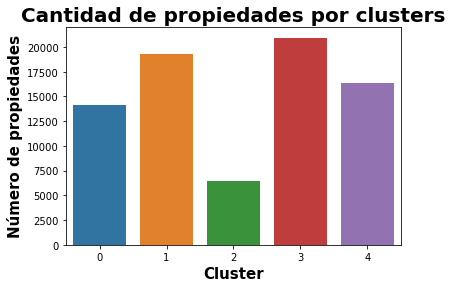

In [138]:
sns.countplot(df_properati['cluster'])
plt.title('Cantidad de propiedades por clusters',fontweight = 'black', fontsize=20);
plt.xlabel('Cluster',fontsize=15,fontweight = 'black')
plt.ylabel('Número de propiedades',fontsize=15,fontweight = 'black');

In [139]:
df_properati.columns

Index(['bedrooms', 'surface_total', 'lat', 'lon', 'rooms', 'bathrooms',
       'surface_covered', 'price', 'property_type_Casa',
       'property_type_Departamento', 'property_type_PH',
       'Region_Bs.As. G.B.A. Zona Norte', 'Region_Bs.As. G.B.A. Zona Oeste',
       'Region_Capital Federal', 'Barrio_Almagro', 'Barrio_Balvanera',
       'Barrio_Barrio Norte', 'Barrio_Belgrano', 'Barrio_Caballito',
       'Barrio_Palermo', 'Barrio_Recoleta', 'Barrio_Vicente López',
       'Barrio_Villa Crespo', 'Barrio_Villa Urquiza', 'cluster'],
      dtype='object')

In [140]:
df_nw = df_properati[['Barrio_Almagro','Barrio_Balvanera','Barrio_Barrio Norte','Barrio_Belgrano','Barrio_Caballito',
                    'Barrio_Palermo','Barrio_Recoleta','Barrio_Vicente López','Barrio_Villa Crespo','Barrio_Villa Urquiza',
                     'cluster']]
df_nw.head()

Barrio_Almagro  Barrio_Balvanera  Barrio_Barrio Norte  Barrio_Belgrano  \
0               0                 0                    0                0   
1               0                 0                    0                0   
2               0                 0                    0                0   
3               0                 0                    0                0   
4               0                 0                    0                0   

   Barrio_Caballito  Barrio_Palermo  Barrio_Recoleta  Barrio_Vicente López  \
0                 0               0                0                     0   
1                 0               1                0                     0   
2                 0               1                0                     0   
3                 0               0                0                     0   
4                 0               0                0                     0   

   Barrio_Villa Crespo  Barrio_Villa Urquiza  cluster  
0                    0                     0        3  
1                    0                     0        3  
2                    0                     0        0  
3                    1                     0        3  
4                    1                     0        3

In [141]:
df_nw.groupby('cluster')['Barrio_Almagro','Barrio_Balvanera','Barrio_Barrio Norte','Barrio_Belgrano','Barrio_Caballito',
                    'Barrio_Palermo','Barrio_Recoleta','Barrio_Vicente López','Barrio_Villa Crespo','Barrio_Villa Urquiza'
                        ].sum()

C:\Users\Leonardo Palacios\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Barrio_Almagro  Barrio_Balvanera  Barrio_Barrio Norte  \
cluster                                                          
0                1189.0             194.0                729.0   
1                1438.0             895.0                281.0   
2                 183.0              52.0                389.0   
3                1616.0             737.0                447.0   
4                1956.0             278.0                531.0   

         Barrio_Belgrano  Barrio_Caballito  Barrio_Palermo  Barrio_Recoleta  \
cluster                                                                       
0                 1345.0            1019.0          2482.0           1202.0   
1                  319.0            1022.0           753.0            333.0   
2                  752.0             392.0          1429.0            879.0   
3                  962.0            1470.0          2282.0            704.0   
4                  921.0            1076.0          2516.0            618.0   

         Barrio_Vicente López  Barrio_Villa Crespo  Barrio_Villa Urquiza  
cluster                                                                   
0                       693.0                674.0                 568.0  
1                       192.0               1694.0                 387.0  
2                       283.0                210.0                 192.0  
3                       523.0               1884.0                 903.0  
4                       608.0               1201.0                 730.0

In [146]:
resumen_cluster = {"Cluster 0":["Barrio_Barrio Norte","Barrio_Belgrano","Barrio_Recoleta","Barrio_Vicente López"], 
                   "Cluster 1":["Barrio_Balvanera","","",""], 
                   "Cluster 2":["","","",""],
                   "Cluster 3":["Barrio_Caballito","Barrio_Villa Crespo","Barrio_Villa Urquiza",""], 
                   "Cluster 4":["Barrio_Almagro", "Barrio_Palermo","",""]}
pd.DataFrame(resumen_cluster)

Cluster 0         Cluster 1 Cluster 2             Cluster 3  \
0   Barrio_Barrio Norte  Barrio_Balvanera                Barrio_Caballito   
1       Barrio_Belgrano                               Barrio_Villa Crespo   
2       Barrio_Recoleta                              Barrio_Villa Urquiza   
3  Barrio_Vicente López                                                     

        Cluster 4  
0  Barrio_Almagro  
1  Barrio_Palermo  
2                  
3

Se puede obervar, segun el KMeans los barrios que son mas parecidos entre si, en que cluster tienen mayor cantidad de propiedades disponible, esto nos da una similitud se los barrios segun las caracteristicas de las propiedades, para que estos se parezcan, sengun la segmentación y la cantidad de propiedades en ca clustering.

In [145]:
#Evaluación
from sklearn import metrics
dv=metrics.davies_bouldin_score(df_properati.drop('cluster', axis=1),df_properati['cluster'])
sil=metrics.silhouette_score(df_properati.drop('cluster', axis=1), df_properati['cluster'])
print(f'Indice Davies and Bouldin={dv}')
print(f'Indice de Silueta={sil}')

Indice Davies and Bouldin=0.5115868289895881
Indice de Silueta=0.5451262664467286


Al observar las medidas de valuación del clustering, el Indice de Silueta no esta tan cercano al cero ni es negativo el indice, por tanto se puede decir que es una metríca aceptable.Sin embargo, tampoco esta muy cerca de 1, lo que quiere decir que se puede mejorar con una optimización de parametros, con el fin se saben la cantidad de clusters ideales. En el presente proyecto se elije trabajar solo con 5 clusters, para ver como segmenta los barrios y hacer una idea del comportamniento de los centroides.